# **Project Name**    - Capstone Project 4 : Unsupervised - Zomato restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member Name -** Monish Tilwani


# **Project Summary -**

This project aims to analyze the Zomato customers reviews and ratings for the restaurants in Hyderabad, and to provide insights into the basic trends, cost-benefit trade-offs, and customer sentiments. The project uses the following steps:

1. Basic EDA on restaurant data and reviews data: This step involves exploring the data set to understand the distribution of ratings, reviews, cuisines, costs, collections, and other features of the restaurants. This step also involves cleaning and preprocessing the data for further analysis.

2. Visualization using different charts: This step involves creating various charts and graphs to visualize the data and identify the patterns and relationships among the features. Some of the charts that can be used are bar charts, pie charts, box plots, scatter plots, heat maps, etc.

3. Hypothesis testing: This step involves testing some hypotheses or assumptions about the data using statistical methods. For example, testing whether the average rating of a restaurant is different from a certain value, or whether the cost of a restaurant is related to its rating or cuisine type.

4. Feature engineering for clustering and sentiment analysis: This step involves creating new features or transforming existing features to make them suitable for clustering and sentiment analysis. For example, c scaling numerical features, extracting keywords or topics from reviews, etc.

5. Clustering analysis using k-means and agglomerative: This step involves applying k-means and agglomerative clustering algorithms to group the restaurants based on their cost and rating performance. This step can help to identify the optimal segments of restaurants that offer high value or low value to the customers.

6. Sentiment analysis on reviews: This step involves applying sentiment analysis techniques to classify the reviews into positive, negative, and neutral sentiments. This step can help to understand the customer feedback and satisfaction towards the restaurants.

The project can help the restaurants to improve their service quality, menu offerings, and customer satisfaction based on the feedback from the customers.



# **GitHub Link -**

https://github.com/Monish-T/Capstone-Project-4-Unsupervised---Zomato-restaurant-Clustering-and-Sentiment-Analysis.git

# **Problem Statement**


Zomato is a popular online platform that allows customers to discover, order, and review restaurants in various cities. The reviews and ratings provided by the customers can help the restaurants to improve their service quality, menu offerings, and customer satisfaction. However, analyzing the large and diverse data set of reviews and ratings can be challenging and time-consuming for the restaurants. Therefore, the aim of this project is to perform a basic analysis of the Zomato customers reviews and ratings for the restaurants in Hyderabad, and to provide insights into the basic trends, cost-benefit trade-offs, and customer sentiments.

The objectives of this project are:

* To perform exploratory data analysis (EDA) on the data set to understand the distribution of ratings, reviews, cuisines, costs, collections, and other features of the restaurants.

* To perform cost vs benefit (rating) clustering analysis on the data set to identify the optimal segments of restaurants based on their cost and rating performance.

* To perform sentiment analysis on the reviews data to extract the positive, negative, and neutral sentiments of the customers towards the restaurants.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

# Basic Libraries
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf

#Importing libraries for NLP
import re
import warnings
warnings.filterwarnings("ignore")
#Installing emot library
!pip install emot
import re
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import string
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
from nltk.tokenize import word_tokenize
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# importing libraries for ML model implementation
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import math
from sklearn import svm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [3]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Load Dataset 1 Restaurant Data
file_path1 = '/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 4 : Unsupervised - Zomato restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv'
restaurant_df = pd.read_csv(file_path1)
restaurant_df1 = pd.read_csv(file_path1)

# Load Dataset 2 Review Data
file_path2 = '/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 4 : Unsupervised - Zomato restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv'
review_df = pd.read_csv(file_path2)
review_df2 = pd.read_csv(file_path2)

### Dataset First View

In [5]:
# Restaurant Dataset First Look
restaurant_df.head()

Name   
0                 Beyond Flavours  \
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost   
0  https://www.zomato.com/hyderabad/beyond-flavou...    800  \
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections   
0  Food Hygiene Rated Restaurants in Hyderabad, C...  \
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines   
0  Chinese, Continental, Kebab, European, South I...  \
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [6]:
# Review Dataset First Look
review_df.head()

Restaurant              Reviewer   
0  Beyond Flavours     Rusha Chakraborty  \
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating   
0  The ambience was good, food was quite good . h...      5  \
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'Number of Rows in restaurant dataframe : {restaurant_df.shape[0]}')
print(f'Number of columns restaurant dataframe : {restaurant_df.shape[1]}')

print(f'\nNumber of Rows in review dataframe : {review_df.shape[0]}')
print(f'Number of columns review dataframe : {review_df.shape[1]}')

Number of Rows in restaurant dataframe : 105
Number of columns restaurant dataframe : 6

Number of Rows in review dataframe : 10000
Number of columns review dataframe : 7


### Dataset Information

In [8]:
# restaurant Dataset Info
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
# Review Dataset Info
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
# Restaurant Dataset Duplicate Value Count
restaurant_df.duplicated().sum()

0

In [11]:
# Review Dataset Duplicate Value Count
review_df.duplicated().sum()

36

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count for restaurant dataset columns
restaurant_null_df = pd.DataFrame(restaurant_df.isna().sum())
restaurant_null_df

0
Name          0
Links         0
Cost          0
Collections  54
Cuisines      0
Timings       1

In [13]:
# Missing Values/Null Values Count for review dataset columns
review_null_df = pd.DataFrame(review_df.isna().sum())
review_null_df

0
Restaurant   0
Reviewer    38
Review      45
Rating      38
Metadata    38
Time        38
Pictures     0

<Axes: >

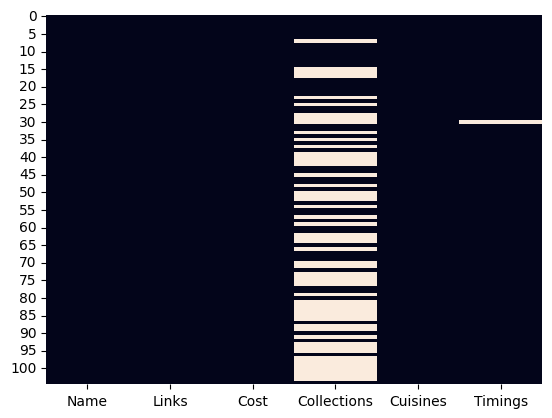

In [14]:
# Visualizing the missing valuesv for restaurant Dataframe 
# Checking Null Value by plotting Heatmap
sns.heatmap(restaurant_df.isnull(), cbar=False)

<Axes: >

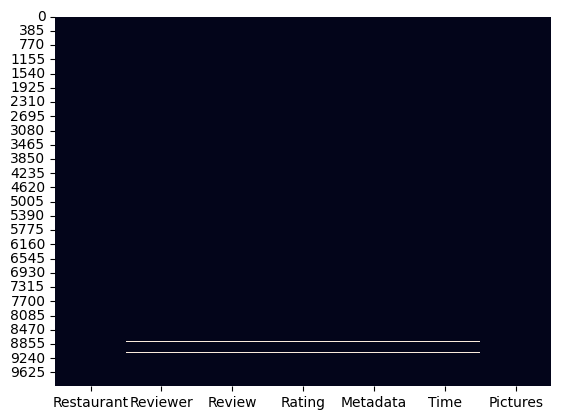

In [15]:
# Visualizing the missing values for review Dataframe 
# Checking Null Value by plotting Heatmap
sns.heatmap(review_df.isnull(), cbar=False)

### What did you know about your dataset?


> **Restaurant details Dataset**

* Number of Rows/Observations = 105 
* Number of Columns/Features = 6
* Null Values - Collections Column has 54 null values and Timings Columns has 1 null values 
* Duplicate Values - No Duplicate values in the DataFrame all observations are unique.
* Data types - Collections and Cuisines should be string Data type and Cot should be a numeric data type. But all this columns are Object Data Type.


> **Reviews details Dataset**

* Number of Rows/Observations = 10000 
* Number of Columns/Features = 7
* Null Values - Reviewer	38, Review	45, Rating	38, Metadata	38, Time	38 null values 
* Duplicate Values - Total of 36 duplicated observations in the DataFrame
* Data types - Reviewer should be string similarly, Review - String, Rating float, Time datetime. But all this columns are Object Data Type.
* Also MetaData has Reviewers details.(number of reviews anda number of Followers)


## ***2. Understanding Your Variables***

In [16]:
# restaurant Dataset Columns
restaurant_df.columns.to_list()

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']

In [17]:
# Review Dataset Columns
review_df.columns.to_list()

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']

In [18]:
# Restaurant Dataset Describe
restaurant_df.describe()

Name                                              Links   
count               105                                                105  \
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections   
count   105                                           51  \
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [19]:
# Review Dataset describe
review_df.describe()

Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

### Variables Description 

**Zomato Restaurant Dataset**

* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Service Timings



**Zomato Restaurant Reviews**

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
uni_res_df = pd.DataFrame()
uni_res_df['variables'] = restaurant_df.columns.to_list()
uni_res_df['unique values'] = uni_res_df['variables'].apply(lambda x : restaurant_df[x].nunique())
uni_res_df

variables  unique values
0         Name            105
1        Links            105
2         Cost             29
3  Collections             42
4     Cuisines             92
5      Timings             77

In [21]:
uni_rev_df = pd.DataFrame()
uni_rev_df['variables'] = review_df.columns.to_list()
uni_rev_df['unique values'] = uni_res_df['variables'].apply(lambda x : restaurant_df[x].nunique())
uni_rev_df

variables  unique values
0  Restaurant          105.0
1    Reviewer          105.0
2      Review           29.0
3      Rating           42.0
4    Metadata           92.0
5        Time           77.0
6    Pictures            NaN

## 3. ***Data Wrangling***

### Data Wrangling Code

#### Restaurant Dataset

Cost

In [22]:
# Checking unique values in cost column
restaurant_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [23]:
# Removing , from the Cost value strings
restaurant_df['Cost'] = restaurant_df['Cost'].apply(lambda x: x.replace(",",""))

# Converting the Cost column datatype to integer
restaurant_df['Cost'] = restaurant_df['Cost'].astype('int')

# Checking the Values of Cost column after applying the changes
restaurant_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [24]:
# Mean Average Cost for a meal of 2
restaurant_df['Cost'].mean()

861.4285714285714

In [25]:
# Median Value of the cost
restaurant_df['Cost'].median()

700.0

In [26]:
# Finding top 5 costliest Restaurants
restaurant_df.sort_values(by=['Cost'],ascending=False).head()

Name   
92               Collage - Hyatt Hyderabad Gachibowli  \
56                   Feast - Sheraton Hyderabad Hotel   
21  Jonathan's Kitchen - Holiday Inn Express & Suites   
18                                  10 Downing Street   
91            Cascade - Radisson Hyderabad Hitec City   

                                                Links  Cost   
92  https://www.zomato.com/hyderabad/collage-hyatt...  2800  \
56  https://www.zomato.com/hyderabad/feast-sherato...  2500   
21  https://www.zomato.com/hyderabad/jonathans-kit...  1900   
18  https://www.zomato.com/hyderabad/10-downing-st...  1900   
91  https://www.zomato.com/hyderabad/cascade-radis...  1800   

                                          Collections   
92                                    Sunday Brunches  \
56  Sunday Brunches, Great Breakfasts, Function Ve...   
21                     Great Italian, Sunday Brunches   
18                                 Trending This Week   
91                                                NaN   

                                             Cuisines   
92  Continental, Italian, North Indian, Chinese, A...  \
56         Modern Indian, Asian, Continental, Italian   
21      North Indian, Japanese, Italian, Salad, Sushi   
18                 North Indian, Chinese, Continental   
91          North Indian, Italian, Continental, Asian   

                                              Timings  
92                                 24 Hours (Mon-Sun)  
56  6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm...  
21                    11:30 AM to 3 PM, 7 PM to 11 PM  
18                             12 Noon to 12 Midnight  
91                                           24 Hours

In [27]:
# top 5 cheapest Restaurants
restaurant_df.sort_values(by=['Cost']).head()

Name                                              Links   
89   Mohammedia Shawarma  https://www.zomato.com/hyderabad/mohammedia-sh...  \
23                  Amul   https://www.zomato.com/hyderabad/amul-gachibowli   
54        Asian Meal Box  https://www.zomato.com/hyderabad/asian-meal-bo...   
101         Sweet Basket  https://www.zomato.com/hyderabad/sweet-basket-...   
59             KS Bakers  https://www.zomato.com/hyderabad/ks-bakers-gac...   

     Cost Collections                     Cuisines   
89    150         NaN         Street Food, Arabian  \
23    150         NaN          Ice Cream, Desserts   
54    200         NaN                        Asian   
101   200         NaN               Bakery, Mithai   
59    200         NaN  Bakery, Desserts, Fast Food   

                                               Timings  
89                                        1 PM to 1 AM  
23                                       10 AM to 5 AM  
54   12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
59                                       9 AM to 10 PM

Collections

In [28]:
# Changing the Data type of the Collections column from object to string
restaurant_df['Collections'] = restaurant_df['Collections'].astype("str")

In [29]:
# Restaurants with No Collection tag
restaurant_df[restaurant_df['Collections']=='nan'].shape[0]

54

In [30]:
# Converting the values of Collection Column from string to list
restaurant_df['Collections'] = restaurant_df['Collections'].apply(lambda x: x.split(","))
restaurant_df['num_of_collections'] = restaurant_df['Collections'].apply(lambda x : 0 if x=='[nan]' else len(x))

# creating a new dataframe to understand collections
Coll_df = restaurant_df[['Name','Collections']]

Coll_df = Coll_df.explode('Collections',ignore_index=True)
Coll_df['Collections'].dropna(inplace=True)

# Restuarants with highest collections
Coll_df['Name'].value_counts().reset_index().head()

Name  count
0          The Fisherman's Wharf      7
1                Beyond Flavours      6
2  The Lal Street - Bar Exchange      5
3     Over The Moon Brew Company      5
4                    Hyper Local      4

In [31]:
# Most Repeated Collections
Coll_df['Collections'].value_counts().reset_index().head()

Collections  count
0                                          nan     54
1  Food Hygiene Rated Restaurants in Hyderabad      6
2                       Live Sports Screenings      6
3                                Great Buffets      6
4                                Great Buffets      5

Cuisines

In [32]:
# Changing the data type of the Cuisines column
restaurant_df['Cuisines'] = restaurant_df['Cuisines'].astype("str")


# Removing the extra spaces from the cuisines names
restaurant_df['Cuisines'] = restaurant_df['Cuisines'].apply(lambda x : x.replace(" ",""))

# Converting the column values from string to list
restaurant_df['Cuisines'] = restaurant_df['Cuisines'].apply(lambda x : x.split(','))

restaurant_df['num_of_cuisines'] = restaurant_df['Cuisines'].apply(lambda x: len(x))

# creating the new cuisines df to better unsterstand the cuisines
cusines_df = restaurant_df[['Name','Cuisines']]

# Restaurant with highest Cuisines
new_cuisines_df = cusines_df.explode('Cuisines')
new_cuisines_df['Name'].value_counts().reset_index().head()

Name  count
0                      Beyond Flavours      6
1  Banana Leaf Multicuisine Restaurant      5
2                          Pista House      5
3           Urban Asia - Kitchen & Bar      5
4                   Al Saba Restaurant      5

In [33]:
# Most Served Cuisines
new_cuisines_df['Cuisines'].value_counts().reset_index().head()

Cuisines  count
0  NorthIndian     61
1      Chinese     43
2  Continental     21
3      Biryani     16
4     FastFood     15

#### review Dataframe

In [34]:
# Count of null values in each column
review_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [35]:
# Review Dataset Duplicate Value Count
review_df.duplicated().sum()

36

In [36]:
# viewing the duplicate observations
review_df[review_df.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [37]:
# dropping 38 rows with all nan values except restaurant name
review_df = review_df.dropna(subset = ['Reviewer'])

In [38]:
# Review Dataset Duplicate Value Count check
review_df.duplicated().sum()

0

In [39]:
# Dropping the duplicated values from the dataframe
# review_df.drop_duplicates(inplace=True)

Restaurant Review

In [40]:
# number of different Restaurant reviewed
review_df['Restaurant'].nunique()

100

We have reviews and ratings for 100 restaurants out of 105 restaurants.

Reviewers

In [41]:
# number of unique reviewers
review_df['Reviewer'].nunique()

7446

In [42]:
# highest Reviews in the data provided
top_reviwers = review_df['Reviewer'].value_counts().reset_index().head(1000)
top_reviwers.head(20)

Reviewer  count
0                      Parijat Ray     13
1                           Ankita     13
2                            Kiran     12
3                     Vedant Killa     11
4                        Jay Mehta     11
5            Manojkumar D Nambisan     10
6                         Priyanka     10
7   Age Of Foodies (Suraj Karambe)     10
8                          Sravani     10
9                       Siva Kumar     10
10                           Nillu      9
11               Prachita Jayaswal      9
12                           Vinay      9
13                 Khushboo Pandey      9
14                 Prasun Gokhlani      9
15                    Anusha Sinha      9
16                           Kumar      9
17                       Avin Seth      8
18                    Aman Agarwal      8
19                          Naveen      8

Metadata

In [43]:
# sample value in Metadata
review_df['Metadata'][0]

'1 Review , 2 Followers'

In [44]:
# changing the dataypr of the column
review_df['Metadata'] = review_df['Metadata'].astype('str')

In [45]:
# converting the values from string to List
review_df['Metadata'] = review_df['Metadata'].apply(lambda x: x.split(","))

# Creating the new column number of reviews for Metadata
review_df['num_of_reviews'] = review_df['Metadata'].apply(lambda x: x[0].split(" ")[0])

In [46]:
# Creating the new column number of followers for Metadata
review_df['num_of_followers'] = review_df['Metadata'].apply(lambda x : x[-1].split(" ")[1])
review_df['num_of_followers'] = review_df['num_of_followers'].apply(lambda x : 0 if x=='Review' else (0 if x == 'Reviews' else x))

In [47]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Restaurant        9962 non-null   object
 1   Reviewer          9962 non-null   object
 2   Review            9955 non-null   object
 3   Rating            9962 non-null   object
 4   Metadata          9962 non-null   object
 5   Time              9962 non-null   object
 6   Pictures          9962 non-null   int64 
 7   num_of_reviews    9962 non-null   object
 8   num_of_followers  9962 non-null   object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [48]:
# converting the data type of the new column from object to int
review_df['num_of_reviews'] = review_df['num_of_reviews'].astype('int')
review_df['num_of_followers'] = review_df['num_of_followers'].astype('int')

Number of Reviews

In [49]:
# new dataframe for detail understanding of critics in industry
critics_df = review_df[['Reviewer','num_of_reviews','num_of_followers']]
critics_df.drop_duplicates(inplace=True)
critics_df.head()

Reviewer  num_of_reviews  num_of_followers
0     Rusha Chakraborty               1                 2
1  Anusha Tirumalaneedi               3                 2
2       Ashok Shekhawat               2                 3
3        Swapnil Sarkar               1                 1
4                Dileep               3                 2

In [50]:
# Reviewer with Highest number of reviews
critics_df.sort_values(by=['num_of_reviews'],ascending=False).head()

Reviewer  num_of_reviews   
3124                           Anvesh Chowdary            1031  \
4512                              ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ             685   
7638                                    Abc098             665   
6627                     Mithun Ravindranathan             560   
9653  Mohd Zubair Ali (Hyderabad.Food.Diaries)             482   

      num_of_followers  
3124              1654  
4512               794  
7638              2275  
6627              2863  
9653              1688

In [51]:
# Reviewer with Highest number of Followers
critics_df.sort_values(by=['num_of_followers'],ascending=False).head()

Reviewer  num_of_reviews  num_of_followers
3927    Satwinder Singh             186             13410
8719         Eat_vth_me              60             13320
3147       Samar Sardar               8             11329
7884  Foodies Hyderabad              31              9494
1177           Srinivas              34              7628

Time

In [52]:
# Changing the datatype of the Time column
review_df['Time'] = pd.to_datetime(review_df["Time"])

In [53]:
# first Review Time
review_df['Time'].min()

Timestamp('2016-05-31 16:41:00')

In [54]:
# Last Review Time
review_df['Time'].max()

Timestamp('2019-05-25 20:23:00')

Month

In [55]:
# creating a new column month from time column
review_df['Month'] = review_df['Time'].dt.month

In [56]:
# month wise number of reviews
review_df['Month'].value_counts()

Month
5     1542
7     1331
4     1247
3     1065
2      719
8      677
1      652
9      645
10     629
12     594
11     569
6      292
Name: count, dtype: int64

Hour

In [57]:
# creating a new column Hour from time column
review_df['Hour'] = review_df['Time'].dt.hour

In [58]:
# Hour of the day wise number of reviews
review_df['Hour'].value_counts()

Hour
22    968
21    877
23    804
14    776
20    714
15    645
13    580
16    549
19    522
0     509
17    480
12    460
18    438
1     313
11    308
10    229
9     171
2     167
8     134
3     102
7      78
4      55
6      44
5      39
Name: count, dtype: int64

Day of The week

In [59]:
# creating a new column for day of the week from time column
review_df['weekday'] = review_df['Time'].apply(lambda x : x.weekday())

In [60]:
# Day of the week wise number of reviews
review_df['weekday'].value_counts()

weekday
6    1827
5    1737
4    1433
2    1282
3    1246
0    1245
1    1192
Name: count, dtype: int64

Rating

In [61]:
# count of unique Ratings
review_df['Rating'].nunique()

10

In [62]:
# distribution of ratings over number of restaurants
review_df['Rating'].value_counts()

Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64

In [63]:
# Changing the rating of single review from Like to integer value(3.5)
review_df['Rating'] = review_df['Rating'].replace("Like","3.5")

In [64]:
# Changing the data type of rating column
review_df['Rating'] = review_df['Rating'].astype('float') 

In [65]:
# Mean avg rating
review_df['Rating'].mean()

3.6010339289299336

In [66]:
# Median of rating
review_df['Rating'].median()

4.0

In [67]:
# Highest rated Restaurants top 5
review_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index().head()

Restaurant  Rating
0       AB's - Absolute Barbecues    4.88
1                          B-Dubs    4.81
2  3B's - Buddies, Bar & Barbecue    4.76
3                        Paradise    4.70
4                        Flechazo    4.66

In [68]:
# Lowest rated Restaurants top 5
review_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=True).reset_index().head()

Restaurant  Rating
0  Hotel Zara Hi-Fi   2.400
1    Asian Meal Box   2.580
2     Pakwaan Grand   2.710
3     Mathura Vilas   2.820
4   Behrouz Biryani   2.825

#### NLP on review column

In [69]:
# Changing the data type of Review column 
review_df['Review'] = review_df['Review'].astype('str')

In [70]:
# Basic Functions Required For NLP Pre Processing

# Function for removing HTML tags
def striptag(data):
  p = re.compile(r'<.*?>')
  return p.sub('',data)

# Function for converting emoticons into word
def convert_emoticons(text):
    for emot,txt in EMOTICONS_EMO.items():
        # text = re.sub(u'('+emot+')', "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
        text = text.replace(emot,(" "+"_".join(txt.replace(",","").split())))
        # text = [x for ]
    return text

# Function for converting emojis into word
def convert_emoji(text):
    for emot,txt in UNICODE_EMOJI.items():
        # text = re.sub(u'('+emot+')', "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
        text = text.replace(emot,(" "+"_".join(txt.replace(",","").split())+" "))
        # text = [x for ]
    return text

# Function for removing punctuation marks
def remove_punctuation(text,punc):
    '''a function for removing punctuation'''
    # import string
    # punc = string.punctuation + "’"
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', punc)
    # return the text stripped of punctuation marks
    return text.translate(translator)

chat_words = {
    "gr8": "great",
    "bcz": "because",
    "thnx": "thanks",
    "ur": "your",
    "u": "you",
    "r": "are",
    "btw": "by the way",
    "lol": "laughing out loud",
    "brb": "be right back",
    "gtg": "got to go",
    # added words
    "idk": "I don't know",
    "omw": "on my way",
    "ttyl": "talk to you later",
    "np": "no problem",
    "ikr": "I know, right?",
    # add more words as needed
}

# create a function that replaces small chat words with standard forms
def replace_chat_words(text):
    # split the text into words
    words = text.split()
    # loop through the words
    for i in range(len(words)):
        # check if the word is in the dictionary
        if words[i] in chat_words:
            # replace the word with its standard form
            words[i] = chat_words[words[i]]
    # join the words back into text
    text = " ".join(words)
    # return the text
    return text

# Function for removing chat words
sw = stopwords.words('english')
def stopword(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

# Function For Lemmitizing words
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(words)



In [71]:
# replacing additional symbols
review_df['Review'] = review_df['Review'].apply(lambda x: x.replace("\n",""))

# removing HTML tags
review_df['Review'] = review_df['Review'].apply(striptag)

# converting emoticons
review_df['Review'] = review_df['Review'].apply(convert_emoticons)

# converting emojis
review_df['Review'] = review_df['Review'].apply(convert_emoji)

# As in the review there is no space for new line in most of the reviews
review_df['Review'] = review_df['Review'].apply(lambda x: x.replace("."," "))

punc = string.punctuation + "’"
punc

# removing punctuation marks
review_df['Review'] = review_df['Review'].apply(lambda x : remove_punctuation(x,punc))

# replacing chat words
review_df['Review'] = review_df['Review'].apply(replace_chat_words)

# removing stopwords
review_df['Review'] = review_df['Review'].apply(stopword)

# lemmitizing the words
review_df['Review'] = review_df['Review'].apply(lemmatize_words)

# removing stop words
review_df['Review'] = review_df['Review'].apply(stopword)



In [72]:
# finding the length of the words in review
review_df['length_of_processed_reviews'] = review_df['Review'].apply(lambda x: len(x))

In [73]:
review_df['length_of_processed_reviews'].value_counts().sort_values(ascending=False)

length_of_processed_reviews
4       428
13      100
110      88
9        87
108      87
       ... 
1410      1
2381      1
736       1
872       1
1021      1
Name: count, Length: 900, dtype: int64

In [74]:
# rating_1 = review_df[(review_df['Rating']==1) | (review_df['Rating']==1.5)]
# rating_2 = review_df[(review_df['Rating']==2) | (review_df['Rating']==2.5)]
# rating_3 = review_df[(review_df['Rating']==3) | (review_df['Rating']==3.5)]
# rating_4 = review_df[(review_df['Rating']==4) | (review_df['Rating']==4.5)]
# rating_5 = review_df[(review_df['Rating']==5)]

In [75]:
# corpus_complete = " ".join(review_df['Review'])

# corpus_complete_tokenized = word_tokenize(corpus_complete)

# corpus_complete_tokenized_freq_dist = nltk.FreqDist(corpus_complete_tokenized)
# corpus_complete_tokenized_freq_dist = corpus_complete_tokenized_freq_dist.most_common(20)

# # converting dictionary to series
# corpus_complete_tokenized_freq_series = pd.Series(dict(corpus_complete_tokenized_freq_dist))

# fig = plt.figure(figsize= (15,7))
# sns.barplot(x=corpus_complete_tokenized_freq_series.index,
#             y=corpus_complete_tokenized_freq_series.values)
# plt.show()

#### Bi variate time and Ratings

Weekday wise ratings

In [76]:
review_df.groupby(['weekday']).agg({'Rating':'mean','Restaurant':'size'})

Rating  Restaurant
weekday                      
0        3.563454        1245
1        3.677852        1192
2        3.633385        1282
3        3.713082        1246
4        3.505234        1433
5        3.609672        1737
6        3.544335        1827

Month wise ratings and number of ratings

In [77]:
review_df.groupby(['Month']).agg({'Rating':'mean','Restaurant':'size'})

Rating  Restaurant
Month                      
1      3.541411         652
2      3.495828         719
3      3.468075        1065
4      3.629110        1247
5      3.886835        1542
6      3.422945         292
7      3.712998        1331
8      3.548006         677
9      3.427907         645
10     3.497615         629
11     3.472759         569
12     3.548822         594

Hour wise ratings and number of ratings

In [78]:
review_df.groupby(['Hour']).agg({'Rating':'mean','Restaurant':'size'})

Rating  Restaurant
Hour                      
0     3.469548         509
1     3.468051         313
2     3.577844         167
3     3.450980         102
4     3.772727          55
5     3.846154          39
6     3.693182          44
7     3.500000          78
8     3.421642         134
9     3.649123         171
10    3.646288         229
11    3.628247         308
12    3.661957         460
13    3.673276         580
14    3.528351         776
15    3.603101         645
16    3.535519         549
17    3.671875         480
18    3.600457         438
19    3.592912         522
20    3.703081         714
21    3.583238         877
22    3.608988         968
23    3.646144         804

#### Avg Rating New column for restaurant df

In [79]:
rating_df = review_df.groupby(['Restaurant'])['Rating'].mean().reset_index()

restaurant_df = pd.merge(restaurant_df,rating_df,left_on='Name',right_on='Restaurant',how='left')

In [80]:
restaurant_df['Rating'].isnull().sum()

5

Cost - Rating

Cost - Collection

In [81]:
Coll_cost_df = restaurant_df[['Name','Collections','Cost','Rating']]

Coll_cost_df['Collection_y_n'] = Coll_cost_df['Collections'].apply(lambda x : 0 if x == ['nan'] else 1)

Coll_cost_df.groupby(['Collection_y_n']).agg({'Cost':'mean','Collection_y_n':'size','Rating':'mean'})

Cost  Collection_y_n    Rating
Collection_y_n                                       
0                624.074074              54  3.438400
1               1112.745098              51  3.766933

In [82]:
Coll_cost_df = Coll_cost_df.explode('Collections',ignore_index=True)
Coll_cost_df['Collections'].dropna(inplace=True)

Coll_cost_df.groupby(['Name']).size().sort_values(ascending=False).reset_index().rename(columns={0:'num_of_collections'}).head(5)

Name  num_of_collections
0          The Fisherman's Wharf                   7
1                Beyond Flavours                   6
2  The Lal Street - Bar Exchange                   5
3     Over The Moon Brew Company                   5
4                    Hyper Local                   4

In [83]:
coll_rest_count = Coll_cost_df.groupby(['Collections']).size().sort_values(ascending=False).reset_index().rename(columns={0:'number_of_restaurants'})
coll_rest_count['Collections'].dropna(inplace=True)

coll_rest_count.head()

Collections  number_of_restaurants
0                                          nan                     54
1                       Live Sports Screenings                      6
2                                Great Buffets                      6
3  Food Hygiene Rated Restaurants in Hyderabad                      6
4                          Corporate Favorites                      5

In [84]:
coll_detail_df = Coll_cost_df.groupby(['Collections']).agg({'Collections':'size','Rating':'mean','Cost':'mean'}).rename(columns={'Collections':'no_of_restaurants'}).reset_index()

coll_detail_df.sort_values(by=['no_of_restaurants'],ascending=False).head(5)

Collections  no_of_restaurants    Rating   
54                                          nan                 54  3.438400  \
13                       Live Sports Screenings                  6  3.793333   
37                                Great Buffets                  6  3.686667   
32  Food Hygiene Rated Restaurants in Hyderabad                  6  3.907338   
2                           Corporate Favorites                  5  4.217000   

           Cost  
54   624.074074  
13  1116.666667  
37   991.666667  
32   866.666667  
2   1300.000000

In [85]:
coll_detail_df.sort_values(by=['Rating'],ascending=False).head(5)

Collections  no_of_restaurants    Rating    Cost
41   Hyderabad's Hottest                  2  4.755000  1200.0
25      Barbecue & Grill                  3  4.586667  1400.0
11   Hyderabad's Hottest                  5  4.540000  1400.0
27      Best Bars & Pubs                  1  4.340000  1200.0
9          Great Buffets                  5  4.288000  1200.0

In [86]:
coll_detail_df.sort_values(by=['Cost'],ascending=False).head(5)

Collections  no_of_restaurants  Rating         Cost
15     Ramzan Mubarak                  1   4.220  2500.000000
5     Function Venues                  1   4.220  2500.000000
8    Great Breakfasts                  1   4.220  2500.000000
50    Sunday Brunches                  3   3.950  2266.666667
18    Sunday Brunches                  1   3.535  1900.000000

In [87]:
coll_detail_df['Collections'].nunique()

55

Cost - cuisines

In [88]:
cuisines_detail_df = restaurant_df[['Name','Cost','Cuisines','Rating']]

cuisines_detail_df['count_of_cuisines'] = cuisines_detail_df['Cuisines'].apply(lambda x : len(x))

cuisines_detail_df.sort_values(by='count_of_cuisines',ascending=False)

Name  Cost   
0                       Beyond Flavours   800  \
36  Banana Leaf Multicuisine Restaurant   700   
31                          Pista House  1000   
70           Urban Asia - Kitchen & Bar  1100   
82                   Al Saba Restaurant   750   
..                                  ...   ...   
90                         Arena Eleven  1600   
76        The Old Madras Baking Company   350   
85                        Momos Delight   200   
16                  NorFest - The Dhaba   550   
54                       Asian Meal Box   200   

                                             Cuisines    Rating   
0   [Chinese, Continental, Kebab, European, SouthI...  4.280000  \
36  [Biryani, SouthIndian, NorthIndian, Chinese, A...  3.690000   
31    [Bakery, NorthIndian, Mughlai, Juices, Chinese]  3.230000   
70               [Asian, Thai, Chinese, Sushi, Momos]  3.650000   
82  [NorthIndian, Chinese, Seafood, Biryani, Hyder...  3.155000   
..                                                ...       ...   
90                                      [Continental]  4.117647   
76                                           [Bakery]  3.615000   
85                                            [Momos]  3.725000   
16                                      [NorthIndian]  4.030000   
54                                            [Asian]  2.580000   

    count_of_cuisines  
0                   6  
36                  5  
31                  5  
70                  5  
82                  5  
..                ...  
90                  1  
76                  1  
85                  1  
16                  1  
54                  1  

[105 rows x 5 columns]

In [89]:
cuisines_detail_df.groupby(['count_of_cuisines']).agg({'Name':'size','Cost':'mean','Rating':'mean'})

Name         Cost    Rating
count_of_cuisines                             
1                    12   591.666667  3.630695
2                    26   636.538462  3.452708
3                    33   830.303030  3.614219
4                    21  1142.857143  3.752201
5                    12  1216.666667  3.540417
6                     1   800.000000  4.280000

In [90]:
cuisines_detail_df = cuisines_detail_df.explode(column=['Cuisines'],ignore_index=True)



### What all manipulations have you done and insights you found?

Cost

* Converting the Cost column datatype to integer

* mean and median Cost
* 5 most costliest restaurant are identified
* 5 cheapest restaurants are identified

Collections

* Changing the Data type of the Collections column from object to string
* 54 restaurant have no tags
* 5 Restaurant with highest number of tags identified
* 5 Most used tags identified

Cuisines

* Changing the data type of the Cuisines column
* Restaurant with highest Cuisines identified
* Most served Cuisine identified


Review Dataset 
* Duplicate Value Count and nan values 
* Dropping 38 rows with all nan values except restaurant name

Restaurant
* number of different Restaurant reviewed - 100 out of 105

Reviewers
* number of unique reviewers 7446
* Highest Number of reviews in the data shared with us 13

MetaData of Reviewer
* changing the dataype of the column
* Creating the new column number of reviews for Metadata
* Creating the new column number of followers for Metadata
* new dataframe for detail understanding of critics in industry
* Top 5 Critics with highest number of Reviews
* Top 5 critics with Highest number of Followers

Time
* Changing the datatype of the Time column
* 1st review and last review date time found

creating a new column month from time column
* month wise number of reviews

creating a new column Hour from time column
* Hour of the day wise number of reviews

creating a new column for day of the week from time column
* Day of the week wise number of reviews

Rating
* count of unique Ratings and there distribution
* Changing the data type of rating column
* Mean and median of ratings is found
* top 5 Highest rated restaurant
* top 5 least rated restaurants

Reviews -NLP preprocessing
Removed HTML tags


bi Variate analysis
* Weekday wise Avg ratings and number of ratings
* Month wise Avg ratings and number of ratings
* Hour wise Avg ratings and number of ratings
* Cost - Collection change in rating with number of collections


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Figure size 600x500 with 0 Axes>

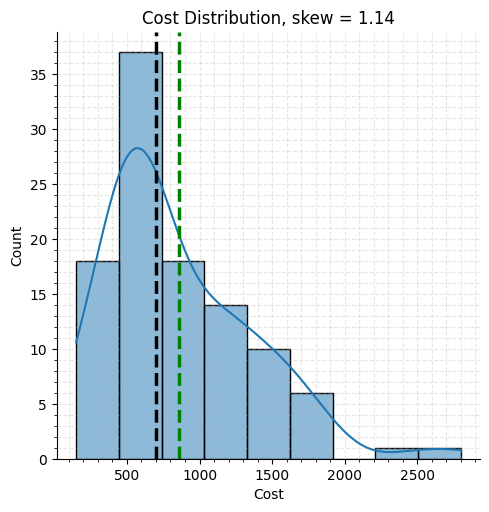

In [91]:
# Chart - 1 visualization code

# Distribution of Dependent variable

# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.displot(data=restaurant_df['Cost'],kde=True)
sk = round(restaurant_df['Cost'].skew(),2)
ax.set(title=f'Cost Distribution, skew = {sk}')

# adding visualizations to chart
plt.minorticks_on()
plt.axvline((restaurant_df['Cost']).mean(),color='g',ls='--',lw=2.5,label='MEAN')
plt.axvline((restaurant_df['Cost']).median(),color='black',ls='--',lw=2.5,label='MEdian')
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

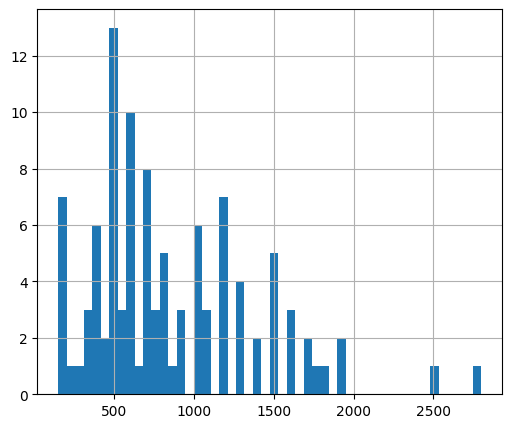

In [92]:
# Ploting Distribution of all the Ratings variable 
restaurant_df['Cost'].hist(figsize=(6,5), bins = 50)
plt.show()

##### 1. Why did you pick the specific chart?

To understand the Distribution of perperson cost of the restaurants.

##### 2. What is/are the insight(s) found from the chart?

Mean of the Cost Distribution is much lower than the median of the Cost distribution. So we can say that the data is right skewed, as we can see than skeweness is more than 1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see the Distribution of the cost of different restaurants. This can help a Business to understand the Cost standing of the restaurants compared to the other restaurants.

Also, for the new venture the graph helps to decide the market trend and accordingly decide the prices on the menus.

#### Chart - 2

<Figure size 600x500 with 0 Axes>

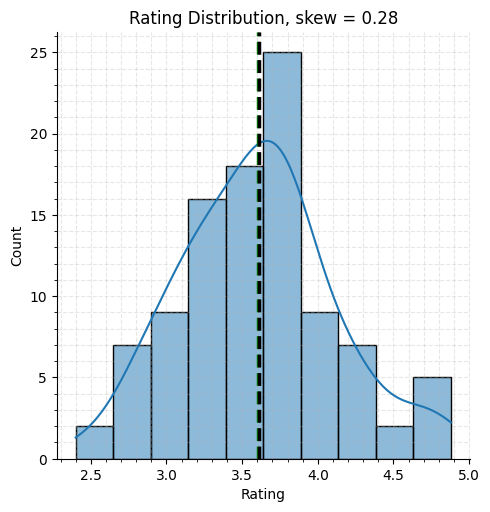

In [93]:
# Chart - 2 visualization code

# Distribution of Ratings variable

# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.displot(data=restaurant_df['Rating'],kde=True)
sk = round(restaurant_df['Rating'].skew(),2)
ax.set(title=f'Rating Distribution, skew = {sk}')

# adding visualizations to chart
plt.minorticks_on()
plt.axvline((restaurant_df['Rating']).mean(),color='g',ls='--',lw=2.5,label='MEAN')
plt.axvline((restaurant_df['Rating']).median(),color='black',ls='--',lw=2.5,label='MEdian')
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

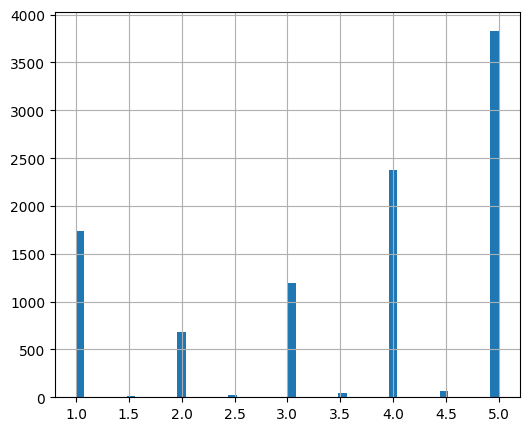

In [94]:
# Ploting Distribution of all the Ratings variable 
review_df['Rating'].hist(figsize=(6,5), bins = 50)
plt.show()

##### 1. Why did you pick the specific chart?

To understand the Distribution of Average Rating Received by the restaurants. and average rating provided by the customers.

##### 2. What is/are the insight(s) found from the chart?

Mean of the Cost Distribution is similar to the median of the Rating distribution. So we can say that the data is normally distributes, as we can see than skeweness is less than 1.  So no transformation is required.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the Distribution of the ratings a restaurant can directly analysis its performance compared to the other restaurants. Also, this can help in setting a target or change the palan as it can help in accessing the performance.

#### Chart - 3

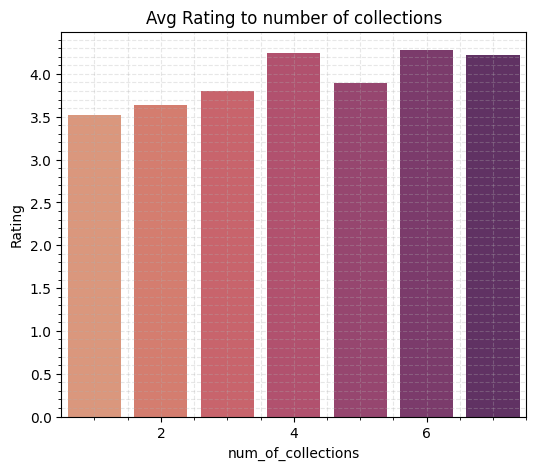

In [95]:
# Chart - 3 visualization code

coll_rating_df = restaurant_df.groupby(['num_of_collections'])['Rating'].mean().reset_index()


# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.barplot(data=coll_rating_df, x="num_of_collections",y="Rating",palette='flare')
ax.set(title='Avg Rating to number of collections')

# adding visualizations to chart
ax.set_xticks(ax.get_xticks()[1::2])
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the relation between number of collections and Ratings received by a restaurant

##### 2. What is/are the insight(s) found from the chart?

As we can see there is a minor relation between the number of collection tags the restaurant has and the rating it receives from the Customer. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that customers are attracted towards more collections.

So, we can say having more number of collection tags can help a restaurant increase its rating

#### Chart - 4

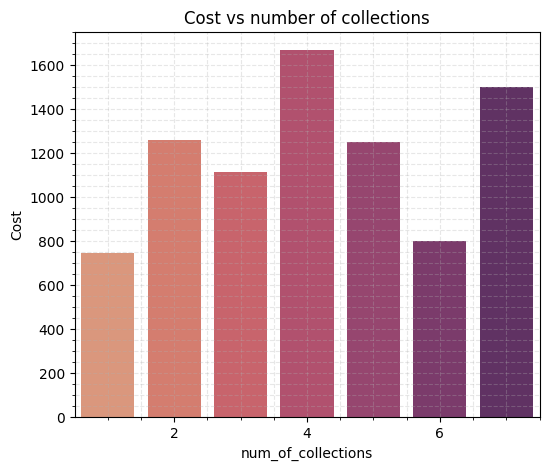

In [96]:
# Chart - 4 visualization code

coll_cost_df = restaurant_df.groupby(['num_of_collections'])['Cost'].mean().reset_index()


# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.barplot(data=coll_cost_df, x="num_of_collections",y="Cost",palette='flare')
ax.set(title='Cost vs number of collections')

# adding visualizations to chart
ax.set_xticks(ax.get_xticks()[1::2])
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

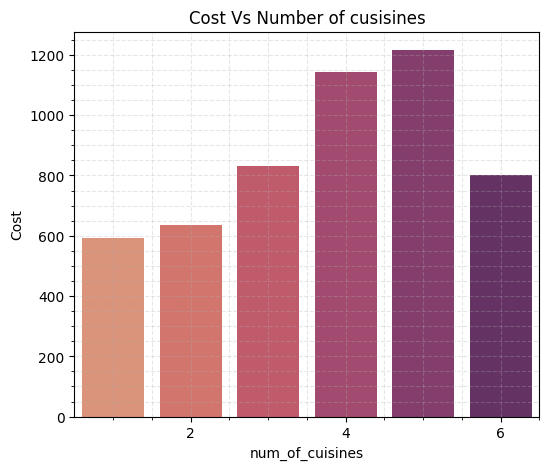

In [97]:
# Chart - 5 visualization code

cui_cost_df = restaurant_df.groupby(['num_of_cuisines'])['Cost'].mean().reset_index()


# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.barplot(data=cui_cost_df, x="num_of_cuisines",y="Cost",palette='flare')
ax.set(title='Cost Vs Number of cusisines')

# adding visualizations to chart
ax.set_xticks(ax.get_xticks()[1::2])
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()


##### 1. Why did you pick the specific chart?

To understand the ralation between number of cuisines served by the restaurant and the charge per person.

##### 2. What is/are the insight(s) found from the chart?

As we can see that cost per person rises as the number od cuisines served bt the restaurant increases. but it dips for 6 cuisines. we should check how many restaurants are serving 6 cuisines.

In [98]:
restaurant_df[restaurant_df['num_of_cuisines']==6]

Name                                              Links  Cost   
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800  \

                                         Collections   
0  [Food Hygiene Rated Restaurants in Hyderabad, ...  \

                                            Cuisines   
0  [Chinese, Continental, Kebab, European, SouthI...  \

                                         Timings  num_of_collections   
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                   6  \

   num_of_cuisines       Restaurant  Rating  
0                6  Beyond Flavours    4.28

There is only 1 restaurant that serves 6 cuisines out of 100. So for hypothesis testing we should remove this variable and perform hypothesis testing.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can clearly see positive correlation between number of cuisines served by the restaurants and per person charge for a meal.

This analyses can help Business compare the cost vs Benefit analysis for higher number of cuisines served to the customer, and can also help in setting up the charges.

#### Chart - 6

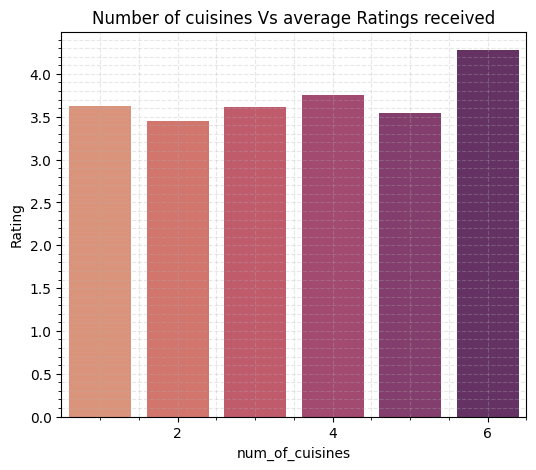

In [99]:
# Chart - 6 visualization code

cui_rat_df = restaurant_df.groupby(['num_of_cuisines'])['Rating'].mean().reset_index()


# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.barplot(data=cui_rat_df, x="num_of_cuisines",y="Rating",palette='flare')
ax.set(title='Number of cuisines Vs average Ratings received')

# adding visualizations to chart
ax.set_xticks(ax.get_xticks()[1::2])
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To analysis the average ratings received by the Restaurants for the number of cuisines served by them.

##### 2. What is/are the insight(s) found from the chart?

As we can see the number of rating received by the restaurant remians uniform against the number of cuisines served. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As, we can see that the number of ratings remains constant with increase in number of cuisines. This signifies that even though higher number of cuisines help restaurant with higher per person cost but on the other hand it is equally difficult to maintain the same service and ratings.

#### Chart - 7

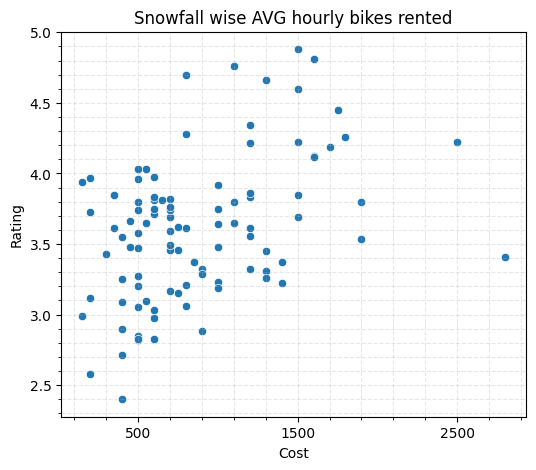

In [100]:
# Chart - 7 visualization code

rat_cost_df = restaurant_df.groupby(['Cost'])['Rating'].mean().reset_index()


# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.scatterplot(data=restaurant_df, x="Cost",y="Rating",palette='flare')
ax.set(title='Snowfall wise AVG hourly bikes rented')

# adding visualizations to chart
ax.set_xticks(ax.get_xticks()[1::2])
ax.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the correlation between the cost per person and ratings received by the restaurants.

##### 2. What is/are the insight(s) found from the chart?

There is a postive correlation between the perperson charge by the restaurant and the ratings received by the restaurant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to the Distribution of cost and rating on can understand the preferences of the users. As to the Avg ratings that can be achieved by the Restaurants according to the cost charged for the meal.

#### Chart - 8

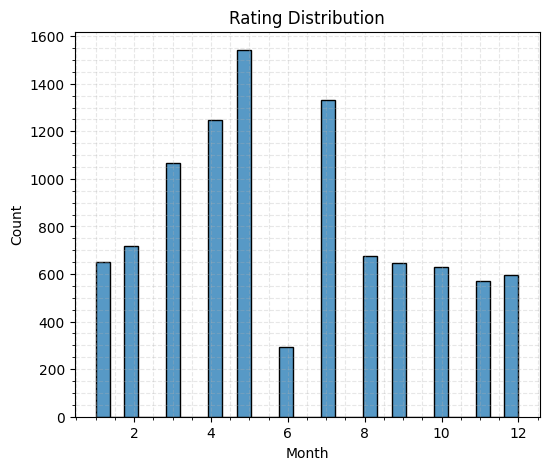

In [101]:
# Chart - 8 visualization code

# Distribution of Dependent variable

# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.histplot(review_df['Month'])
ax.set(title=f'Rating Distribution')

# adding visualizations to chart
plt.minorticks_on()
# plt.axvline((restaurant_df['Rating']).mean(),color='g',ls='--',lw=2.5,label='MEAN')
# plt.axvline((restaurant_df['Rating']).median(),color='black',ls='--',lw=2.5,label='MEdian')
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the Distribution of rating provided by the customer over the different Months in the year.

##### 2. What is/are the insight(s) found from the chart?

There is a sudden drop in the number of ratings received in the month of June. Should inform for the same to the Data Team. For better analysis.

Also the monthly trend can be easily understood from the graph. Highest ratings are received in the month on may. and after that we can see the sudden drop in the trend.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The chart helps the business in understanding the trend in reviews provide by the customer.

Whenever business is planning for promotion to increase the ratings the month of april , may and July will be the best for the same.

#### Chart - 9

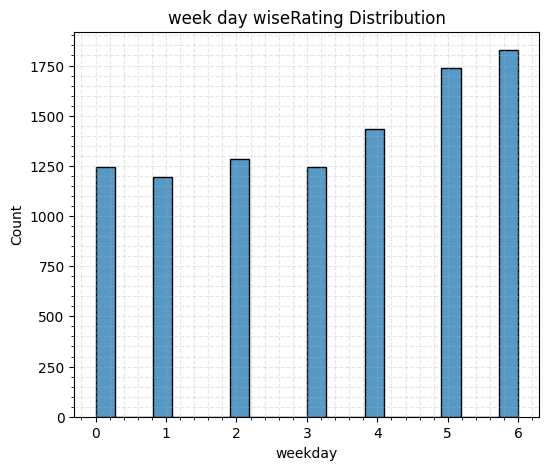

In [102]:
# Chart - 9 visualization code

# Distribution of Dependent variable

# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.histplot(review_df['weekday'])
# sk = round(restaurant_df['Rating'].skew(),2)
ax.set(title=f'week day wiseRating Distribution')

# adding visualizations to chart
plt.minorticks_on()
# plt.axvline((restaurant_df['Rating']).mean(),color='g',ls='--',lw=2.5,label='MEAN')
# plt.axvline((restaurant_df['Rating']).median(),color='black',ls='--',lw=2.5,label='MEdian')
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the weekday wise trend in number of reviews provided by the customer.

##### 2. What is/are the insight(s) found from the chart?

We can judge the trend from the graph that as the week passes the number of daily ratings provided by the customer increases. uptill the weekend.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that more customer prefer to provided ratings on the weekend rather than a weekday. So, if any promotion is being planned for increasing the reviews should be planned on weekends. 

#### Chart - 10

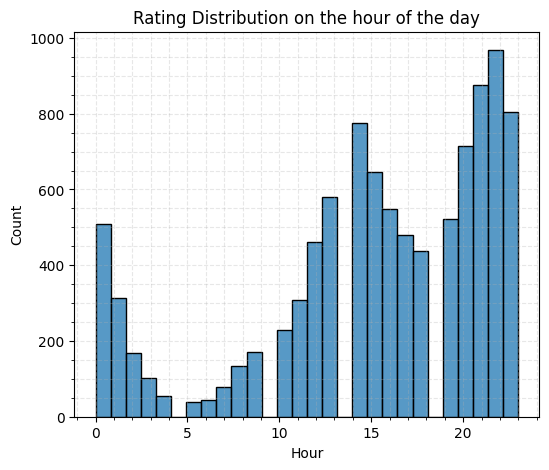

In [103]:
# Chart - 10 visualization code

# Distribution of Dependent variable

# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
ax= sns.histplot(review_df['Hour'])
# sk = round(restaurant_df['Rating'].skew(),2)
ax.set(title=f'Rating Distribution on the hour of the day')

# adding visualizations to chart
plt.minorticks_on()
# plt.axvline((restaurant_df['Rating']).mean(),color='g',ls='--',lw=2.5,label='MEAN')
# plt.axvline((restaurant_df['Rating']).median(),color='black',ls='--',lw=2.5,label='MEdian')
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the relation of ratings provided by customer over the time of the day.

##### 2. What is/are the insight(s) found from the chart?

the trend can easily be noticed. The ratings provided increases from the morning till the noon which is lunch time. which again drops till evening and increases at the dinner time from 7 pm to 11pm and after that is drops.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The ratings provided explains the behaviour of the customer through out the day.

If any message is to be dropped for the rating the best time will be noon around 3pm or in the evening after 7pm.

#### Chart - 11

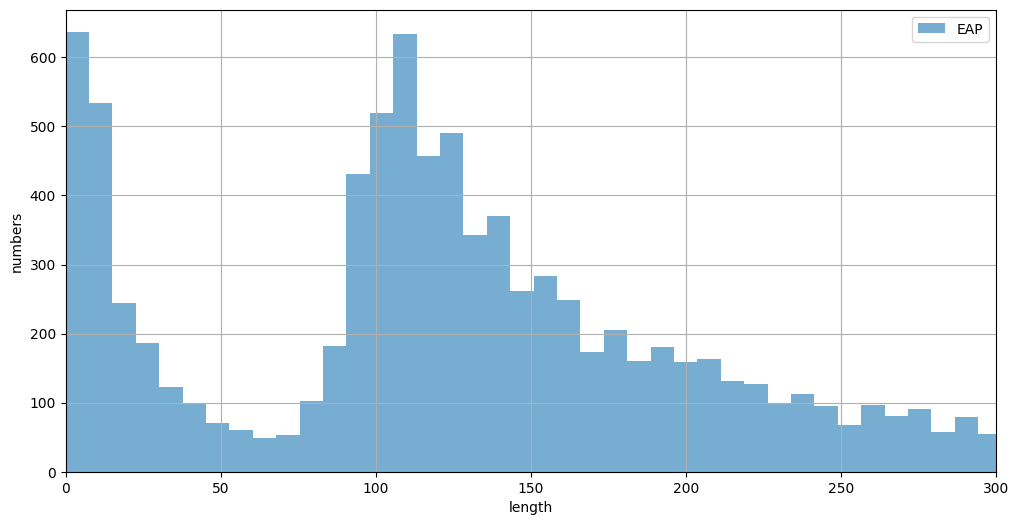

In [104]:
# Chart - 11 visualization code

plt.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(review_df['length_of_processed_reviews'], alpha = 0.6, bins=bins, label='EAP')
# plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
# plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

To understand the distribution on number of words in the reviews.

##### 2. What is/are the insight(s) found from the chart?

Customer either prefer to write a short review less than 10 words. or customer prefer to write reviews bwtween 80 to 150 words.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

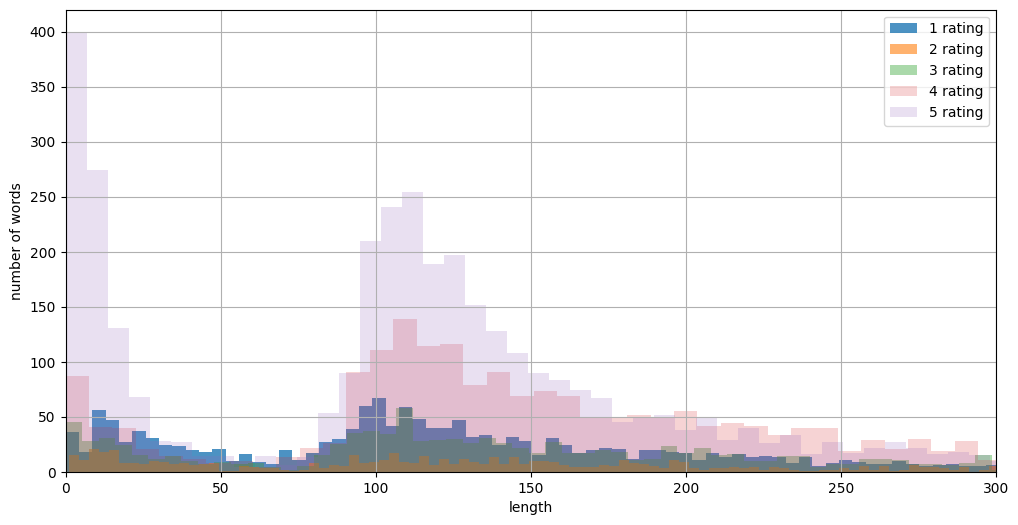

In [105]:
# Chart - 12 visualization code

rating_1 = review_df[(review_df['Rating']==1) | (review_df['Rating']==1.5)]
rating_2 = review_df[(review_df['Rating']==2) | (review_df['Rating']==2.5)]
rating_3 = review_df[(review_df['Rating']==3) | (review_df['Rating']==3.5)]
rating_4 = review_df[(review_df['Rating']==4) | (review_df['Rating']==4.5)]
rating_5 = review_df[(review_df['Rating']==5)]


plt.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(rating_1['length_of_processed_reviews'], alpha = 0.8, bins=bins, label='1 rating')
plt.hist(rating_2['length_of_processed_reviews'], alpha = 0.6, bins=bins, label='2 rating')
plt.hist(rating_3['length_of_processed_reviews'], alpha = 0.4, bins=bins, label='3 rating')
plt.hist(rating_4['length_of_processed_reviews'], alpha = 0.2, bins=bins, label='4 rating')
plt.hist(rating_5['length_of_processed_reviews'], alpha = 0.2, bins=bins, label='5 rating')

plt.xlabel('length')
plt.ylabel('number of words')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

To understand the review word length for different ratings of reviews. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

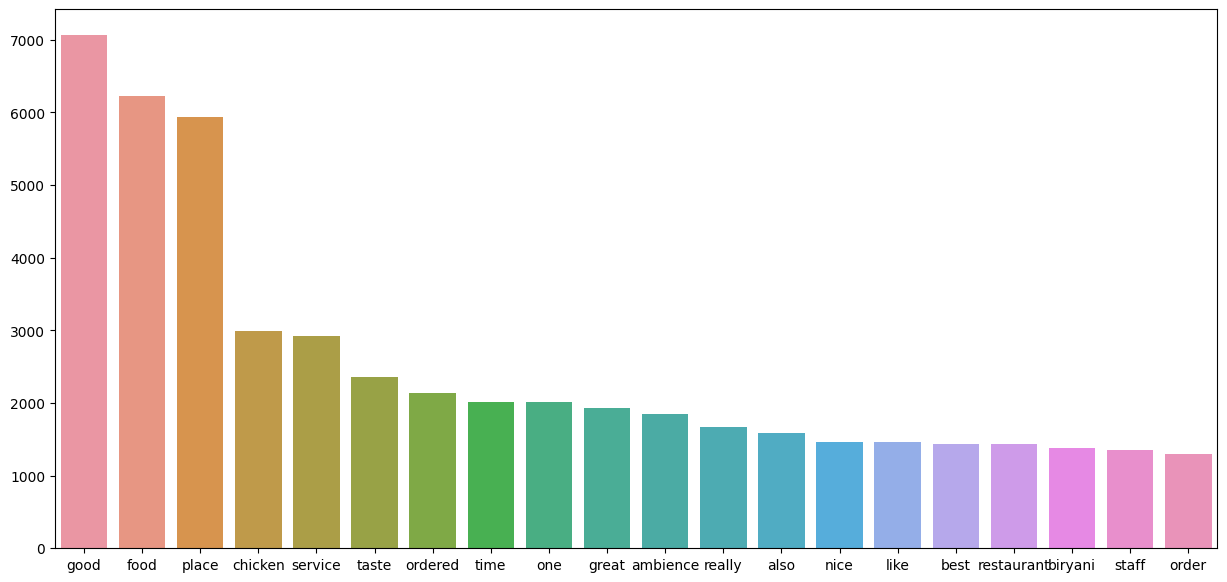

In [106]:
# Chart - 13 visualization code

corpus_complete = " ".join(review_df['Review'])

corpus_complete_tokenized = word_tokenize(corpus_complete)

corpus_complete_tokenized_freq_dist = nltk.FreqDist(corpus_complete_tokenized)
corpus_complete_tokenized_freq_dist = corpus_complete_tokenized_freq_dist.most_common(20)

# converting dictionary to series
corpus_complete_tokenized_freq_series = pd.Series(dict(corpus_complete_tokenized_freq_dist))

fig = plt.figure(figsize= (15,7))
sns.barplot(x=corpus_complete_tokenized_freq_series.index,
            y=corpus_complete_tokenized_freq_series.values)
plt.show()

##### 1. Why did you pick the specific chart?

To find the count of words most used by reviewers in the review.

##### 2. What is/are the insight(s) found from the chart?

Food is the most talked abot topic. followed by place , Service, order service time and then ambience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graph helps us understand what is the most prominent items that customer are looking for according to the count of times they are talking about it.

#### Chart - 14

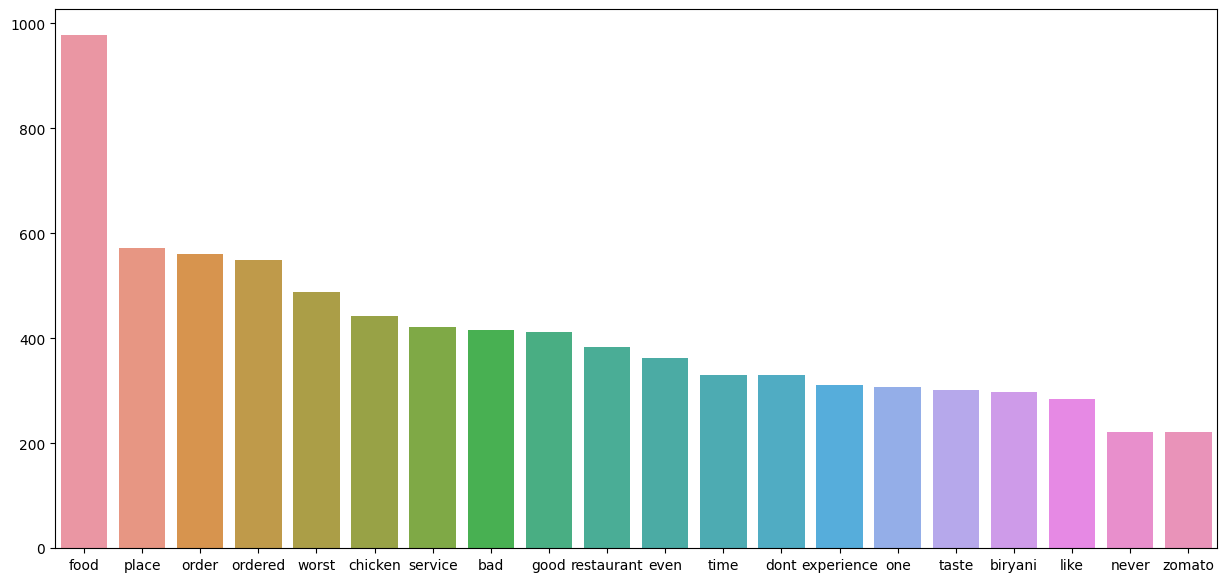

In [107]:
# Chart - 14 visualization code

corpus_complete = " ".join(rating_1['Review'])
# corpus_complete2 = " ".join(rating_2['Review'])
# corpus_complete = corpus_complete1 + corpus_complete2
corpus_complete_tokenized = word_tokenize(corpus_complete)

corpus_complete_tokenized_freq_dist = nltk.FreqDist(corpus_complete_tokenized)
corpus_complete_tokenized_freq_dist = corpus_complete_tokenized_freq_dist.most_common(20)

# converting dictionary to series
corpus_complete_tokenized_freq_series = pd.Series(dict(corpus_complete_tokenized_freq_dist))

fig = plt.figure(figsize= (15,7))
sns.barplot(x=corpus_complete_tokenized_freq_series.index,
            y=corpus_complete_tokenized_freq_series.values)
plt.show()

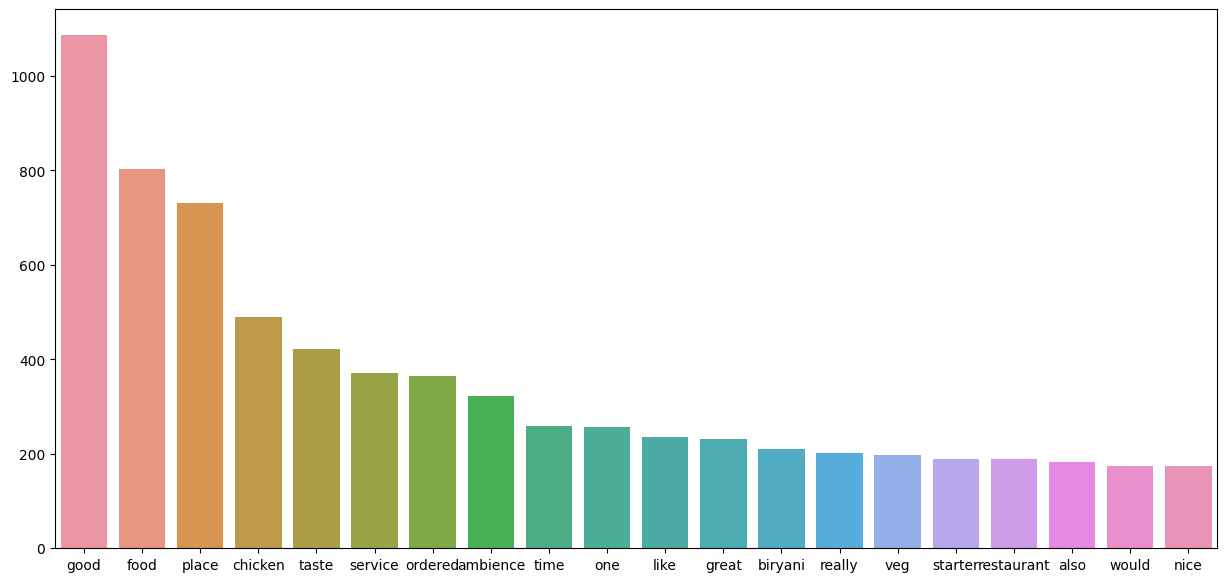

In [108]:
corpus_complete = " ".join(rating_3['Review'])
# corpus_complete2 = " ".join(rating_2['Review'])
# corpus_complete = corpus_complete1 + corpus_complete2
corpus_complete_tokenized = word_tokenize(corpus_complete)

corpus_complete_tokenized_freq_dist = nltk.FreqDist(corpus_complete_tokenized)
corpus_complete_tokenized_freq_dist = corpus_complete_tokenized_freq_dist.most_common(20)

# converting dictionary to series
corpus_complete_tokenized_freq_series = pd.Series(dict(corpus_complete_tokenized_freq_dist))

fig = plt.figure(figsize= (15,7))
sns.barplot(x=corpus_complete_tokenized_freq_series.index,
            y=corpus_complete_tokenized_freq_series.values)
plt.show()

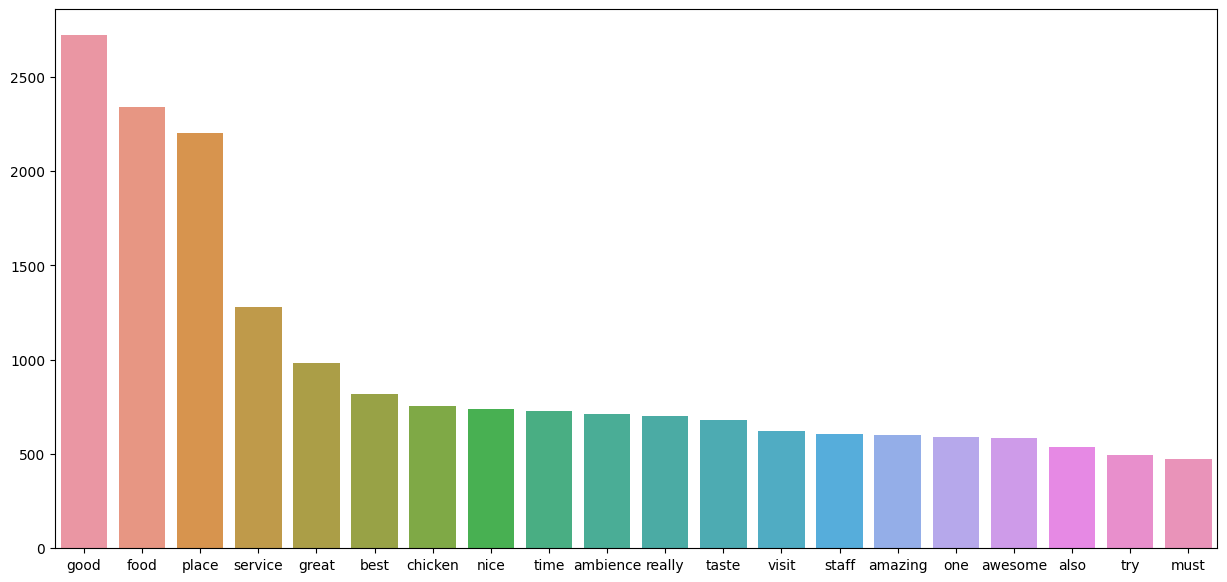

In [109]:
corpus_complete = " ".join(rating_5['Review'])
# corpus_complete2 = " ".join(rating_2['Review'])
# corpus_complete = corpus_complete1 + corpus_complete2
corpus_complete_tokenized = word_tokenize(corpus_complete)

corpus_complete_tokenized_freq_dist = nltk.FreqDist(corpus_complete_tokenized)
corpus_complete_tokenized_freq_dist = corpus_complete_tokenized_freq_dist.most_common(20)

# converting dictionary to series
corpus_complete_tokenized_freq_series = pd.Series(dict(corpus_complete_tokenized_freq_dist))

fig = plt.figure(figsize= (15,7))
sns.barplot(x=corpus_complete_tokenized_freq_series.index,
            y=corpus_complete_tokenized_freq_series.values)
plt.show()

##### 1. Why did you pick the specific chart?

To understand the different words used by the customer for Different sentiments.

##### 2. What is/are the insight(s) found from the chart?

Most of the words used are same except for rating =1 there are few different words.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

these three different charts help us understand different words used by customers for different sentiments/ratings.

#### Chart - 15

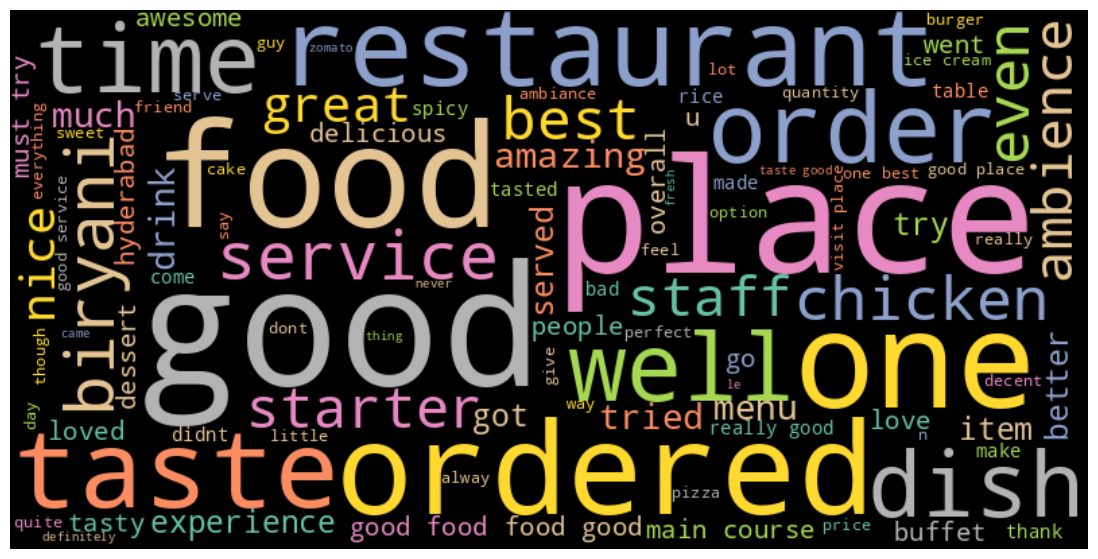

In [110]:
# Chart - 15 visualization code

corpus_complete = " ".join(review_df['Review'])

wc =WordCloud(background_color='black',max_font_size=125,max_words=100,width=800,height=400,
              colormap='Set2')

wc.generate(corpus_complete)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

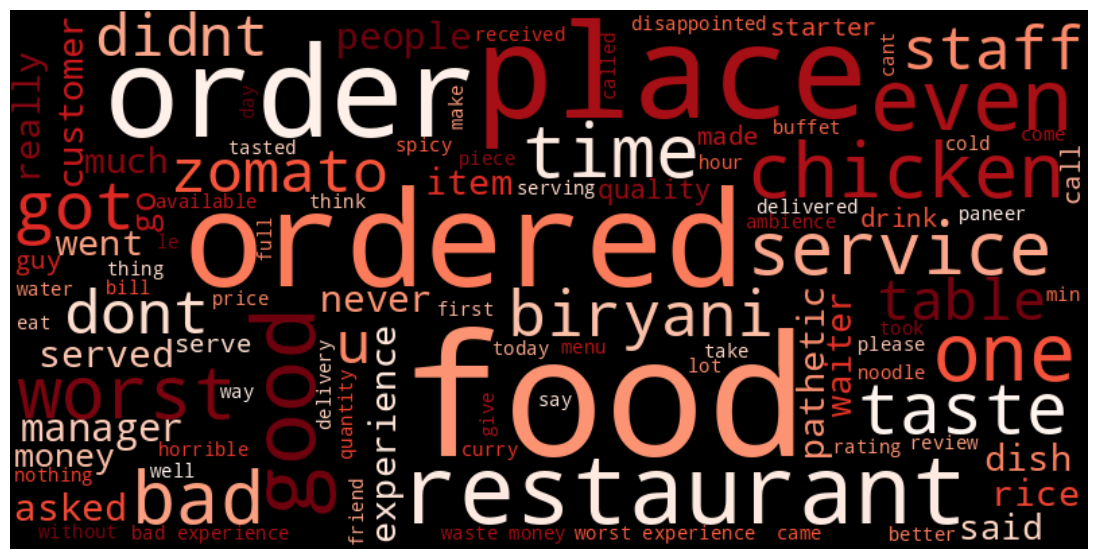

In [111]:
corpus_complete = " ".join(rating_1['Review'])

wc =WordCloud(background_color='black',max_font_size=125,max_words=100,width=800,height=400,
              colormap='Reds')

wc.generate(corpus_complete)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

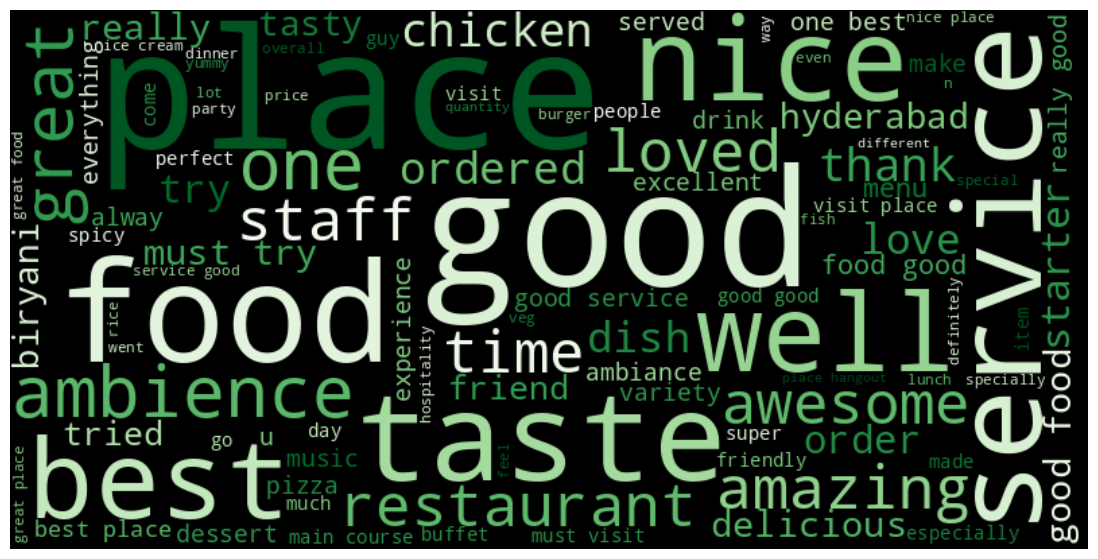

In [112]:
corpus_complete = " ".join(rating_5['Review'])

wc =WordCloud(background_color='black',max_font_size=125,max_words=100,width=800,height=400,
              colormap='Greens')

wc.generate(corpus_complete)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

To better understand the owrds used by customer in there reviews for different ratings of reviews.

##### 2. What is/are the insight(s) found from the chart?

Customer mostly use same words but there are certain particular words which dont have meaning singularly so we will try n garms technique

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 16

In [113]:
from nltk.util import ngrams

In [114]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

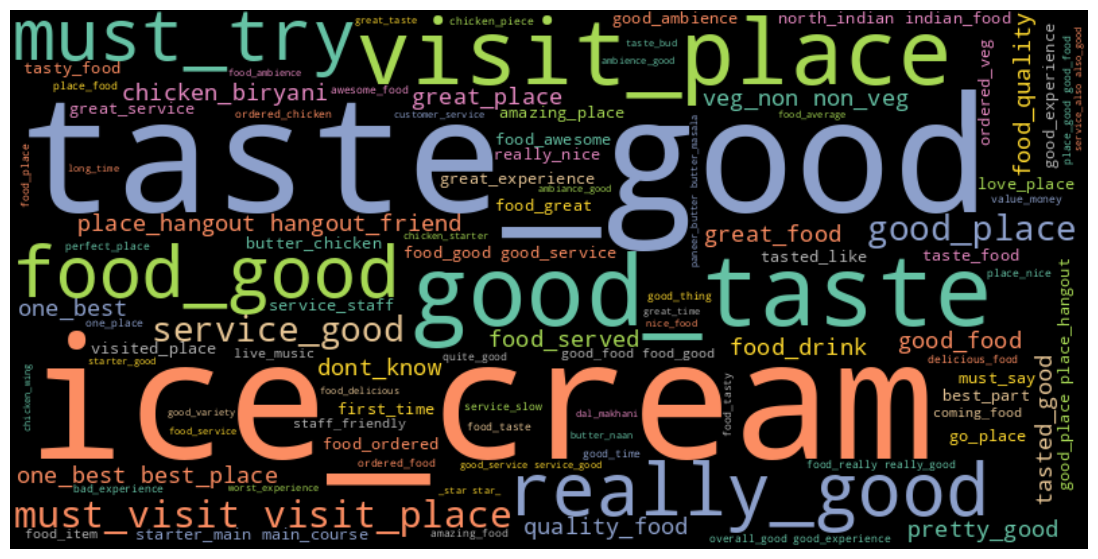

In [115]:
# Chart - 16 visualization code

corpus_complete = " ".join(review_df['Review'])
bi_gram_corpus = extract_ngrams(corpus_complete,2)

wc =WordCloud(background_color='black',max_font_size=125,max_words=100,width=800,height=400,
              colormap='Set2')

for index,text in enumerate(bi_gram_corpus):
  bi_gram_corpus[index] = text.replace(" ","_") 
# bi_gram_corpus

wc.generate(" ".join(bi_gram_corpus))

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

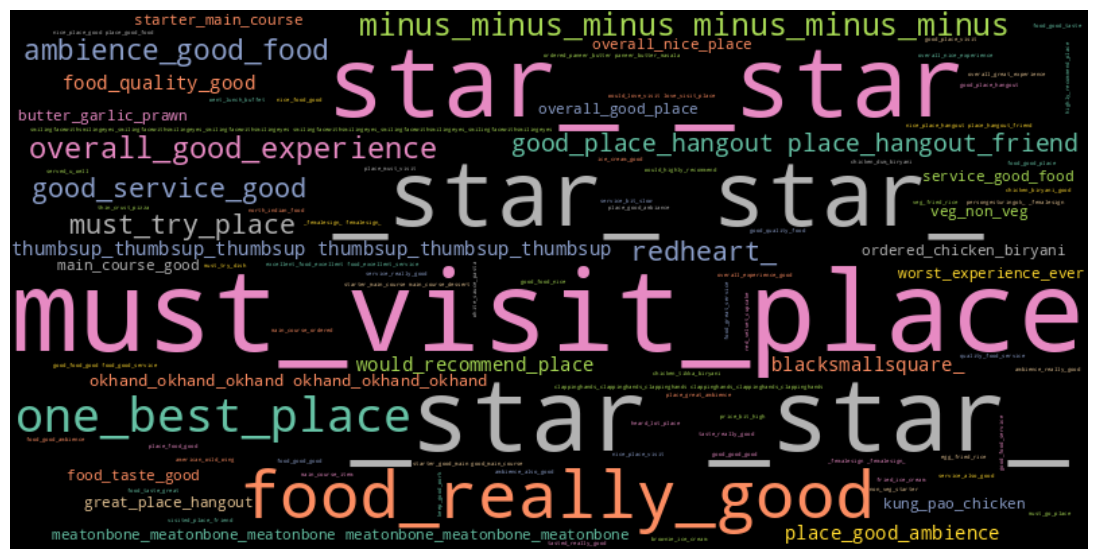

In [116]:
corpus_complete = " ".join(review_df['Review'])
bi_gram_corpus = extract_ngrams(corpus_complete,3)

wc =WordCloud(background_color='black',max_font_size=125,max_words=100,width=800,height=400,
              colormap='Set2')

for index,text in enumerate(bi_gram_corpus):
  bi_gram_corpus[index] = text.replace(" ","_") 
# bi_gram_corpus

wc.generate(" ".join(bi_gram_corpus))

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

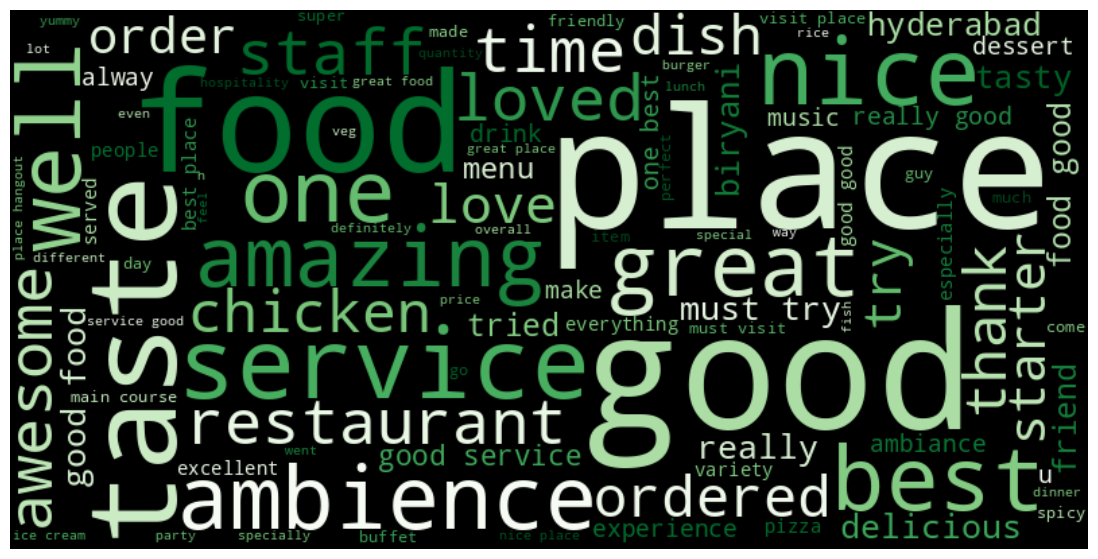

In [117]:
corpus_complete = " ".join(rating_5['Review'])

wc =WordCloud(background_color='black',max_font_size=125,max_words=100,width=800,height=400,
              colormap='Greens')

wc.generate(corpus_complete)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

As single words were not able to explain the relation. we used bigram technique to better understand words used by the customer.

##### 2. What is/are the insight(s) found from the chart?

with Bi gram words we can better understand the meaning behind the words.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Bi gram technique helps business to easliy bifarcate between the sentiments of the tweet

#### Chart - 14 - Correlation Heatmap

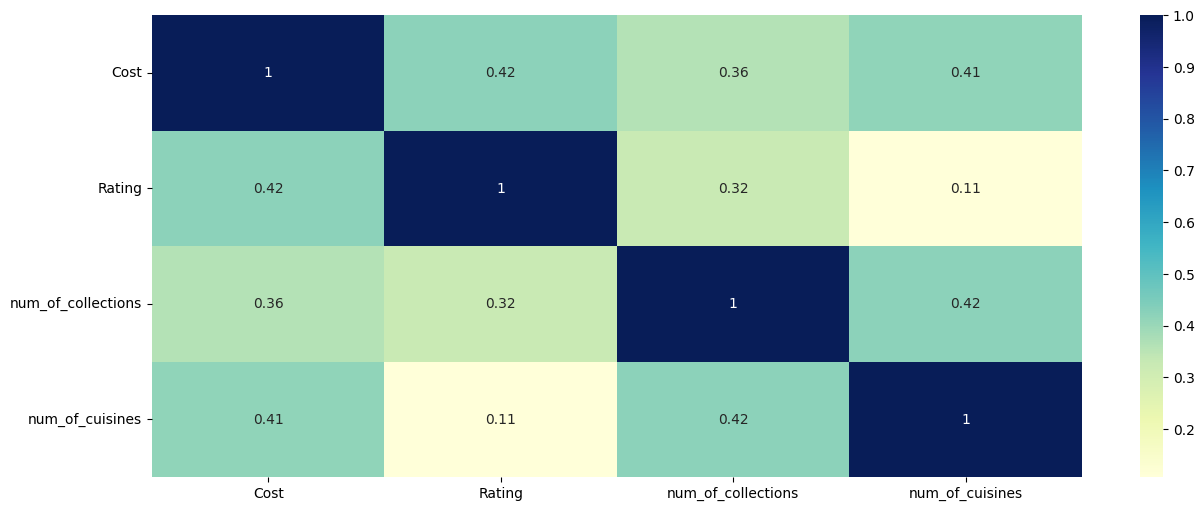

In [118]:
# Correlation Heatmap visualization code
# Correlation Heatmap visualization code
corr_df = restaurant_df[['Cost','Rating','num_of_collections','num_of_cuisines']]
plt.figure(figsize=(15,6))

# setting the axis for graph
sns.heatmap(abs(corr_df.corr()), cmap="YlGnBu", annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

To understand the correlation between numerical variable

##### 2. What is/are the insight(s) found from the chart?

There is least correlation between number of cuisines and Ratings received by the restaurant.

#### Chart - 15 - Pair Plot 

<Figure size 1500x1500 with 0 Axes>

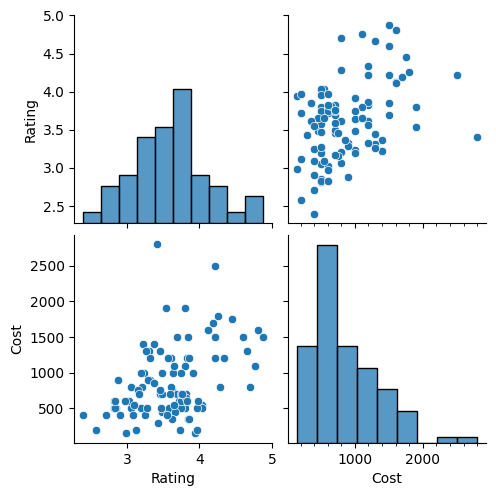

In [119]:
# Pair Plot visualization code

# Pair Plot visualization code
plt.figure(figsize=(15,15))
# setting the axis for graph
sns.pairplot(restaurant_df[['Rating','Cost']])
# adding visualizations to chart
plt.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the distribution and relation between Cost and Rating.

##### 2. What is/are the insight(s) found from the chart?

Cost and rating do not have similar distribution. also the relation is some what linear. As the distribution of cost is skewedwe should transform the data before finding the relation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The cost of a restaurant is positively correlated with the rating it received.

2. Restaurants that more number of collection tags will have a higher Cost.

3. Restaurants that offer a wider variety of cuisines will have a higher Cost.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

#### 2. Perform an appropriate statistical test.

In [120]:
# Perform Statistical Test to obtain P-Value
model = smf.ols(formula='Rating ~ Cost', data= restaurant_df).fit()

In [121]:
# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The collection tags offered by a restaurant has no effect on its Cost. (H0: 𝛽2 = 0)

Alternative hypothesis: The collection tags offered by a restaurant has a positive effect on its Cost. (H1: 𝛽2 > 0)

#### 2. Perform an appropriate statistical test.

In [122]:
# Perform Statistical Test to obtain P-Value
# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(coll_cost_df)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

 used chi-squared test for independence to test the relationship between the variety of Collection tags offered by a restaurant and its Cost.

##### Why did you choose the specific statistical test?

suitable for comparing the relationship between two variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its Cost. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its Cost. (H1: 𝛽3 > 0)

#### 2. Perform an appropriate statistical test.

In [123]:
# cui_cost_df = restaurant_df.groupby(['num_of_cuisines'])['Cost'].mean().reset_index()
cui_cost_df = cui_cost_df.head()

In [124]:
# Perform Statistical Test to obtain P-Value
# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(cui_cost_df)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

 used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its Cost.

##### Why did you choose the specific statistical test?

suitable for comparing the relationship between two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [125]:
# Handling Missing Values & Missing Value Imputation
X_cluster = restaurant_df[['Cost','Rating']]
X_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cost    105 non-null    int64  
 1   Rating  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


In [126]:
X_cluster.dropna(inplace=True)
# restaurant_df.dropna(inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Reviwers data has reviews for only 100 restaurants and as the ML model is to be applied for clustering needs the value of rating we will drop 5 restaurants and will not include them in analysis

### 2. Handling Outliers

In [127]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding - Not required

In [128]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [129]:

# Basic Functions Required For NLP Pre Processing


def striptag(data):
  p = re.compile(r'<.*?>')
  return p.sub('',data)

# Function for converting emoticons into word
def convert_emoticons(text):
    for emot,txt in EMOTICONS_EMO.items():
        # text = re.sub(u'('+emot+')', "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
        text = text.replace(emot,(" "+"_".join(txt.replace(",","").split())))
        # text = [x for ]
    return text

def convert_emoji(text):
    for emot,txt in UNICODE_EMOJI.items():
        # text = re.sub(u'('+emot+')', "_".join(EMOTICONS_EMO[emot].replace(",","").split()), text)
        text = text.replace(emot,(" "+"_".join(txt.replace(",","").split())+" "))
        # text = [x for ]
    return text

def remove_punctuation(text,punc):
    '''a function for removing punctuation'''
    # import string
    # punc = string.punctuation + "’"
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', punc)
    # return the text stripped of punctuation marks
    return text.translate(translator)

chat_words = {
    "gr8": "great",
    "bcz": "because",
    "thnx": "thanks",
    "ur": "your",
    "u": "you",
    "r": "are",
    "btw": "by the way",
    "lol": "laughing out loud",
    "brb": "be right back",
    "gtg": "got to go",
    # added words
    "idk": "I don't know",
    "omw": "on my way",
    "ttyl": "talk to you later",
    "np": "no problem",
    "ikr": "I know, right?",
    # add more words as needed
}

# create a function that replaces small chat words with standard forms
def replace_chat_words(text):
    # split the text into words
    words = text.split()
    # loop through the words
    for i in range(len(words)):
        # check if the word is in the dictionary
        if words[i] in chat_words:
            # replace the word with its standard form
            words[i] = chat_words[words[i]]
    # join the words back into text
    text = " ".join(words)
    # return the text
    return text

sw = stopwords.words('english')
def stopword(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(words)





preprocessing steps for NLP

In [130]:
# replacing additional symbols
review_df['Review'] = review_df['Review'].apply(lambda x: x.replace("\n",""))

# removing HTML tags
review_df['Review'] = review_df['Review'].apply(striptag)

# converting emoticons
review_df['Review'] = review_df['Review'].apply(convert_emoticons)

# converting emojis
review_df['Review'] = review_df['Review'].apply(convert_emoji)

# As in the review there is no space for new line in most of the reviews
review_df['Review'] = review_df['Review'].apply(lambda x: x.replace("."," "))

punc = string.punctuation + "’"
punc

# removing punctuation marks
review_df['Review'] = review_df['Review'].apply(lambda x : remove_punctuation(x,punc))

# replacing chat words
review_df['Review'] = review_df['Review'].apply(replace_chat_words)

# removing stopwords
review_df['Review'] = review_df['Review'].apply(stopword)

# lemmitizing the words
review_df['Review'] = review_df['Review'].apply(lemmatize_words)

# removing stop words
review_df['Review'] = review_df['Review'].apply(stopword)

review_df['Review'] = review_df['Review'].apply(lambda x: x.strip())

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [131]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [132]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

As we already know from EDA analysis that our data is skewed so applying Transformation as clustering analysis is distance based algorithm.

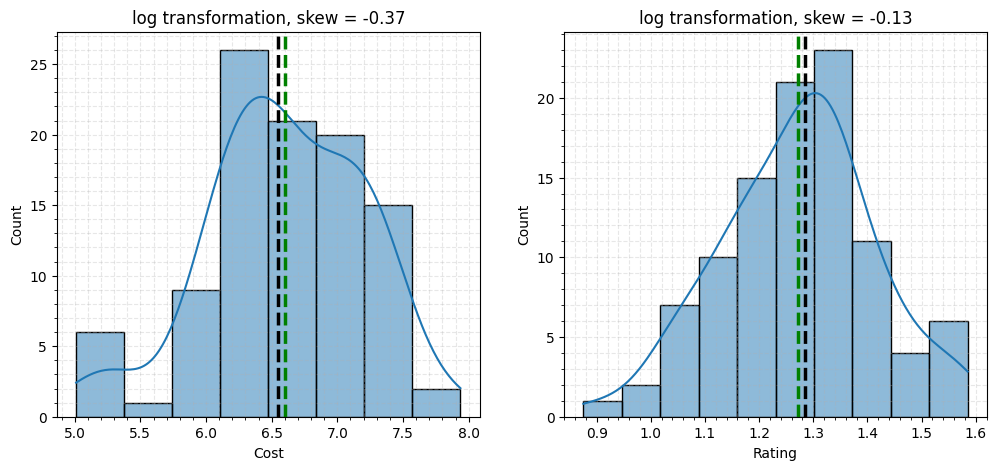

In [133]:
# Transform Your data
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))

sns.histplot(ax=ax1,data=np.log(X_cluster['Cost']),kde=True)
sk = round(np.log(X_cluster['Cost']).skew(),2)
ax1.set(title=f'log transformation, skew = {sk}')

 
# adding visualizations to chart

ax1.axvline(np.log(X_cluster['Cost']).mean(),color='g',ls='--',lw=2.5,label='MEAN')
ax1.axvline(np.log(X_cluster['Cost']).median(),color='black',ls='--',lw=2.5,label='MEdian')

# sm.qqplot(np.log(X_cluster['Cost']),line='45',fit=True,dist=norm,alpha=0.2,ax=ax2)

sns.histplot(ax=ax2,data=np.log(X_cluster['Rating']),kde=True)
sk = round(np.log(X_cluster['Rating']).skew(),2)

ax2.set(title=f'log transformation, skew = {sk}')

 
# adding visualizations to chart

ax2.axvline(np.log(X_cluster['Rating']).mean(),color='g',ls='--',lw=2.5,label='MEAN')
ax2.axvline(np.log(X_cluster['Rating']).median(),color='black',ls='--',lw=2.5,label='MEdian')

ax1.grid(which='both',alpha=0.3,linestyle='--')
ax1.minorticks_on()
ax2.grid(which='both',alpha=0.3,linestyle='--')
ax2.minorticks_on()

plt.show()

In [134]:
X_cluster['Cost'] = X_cluster['Cost'].apply(lambda x : np.log(x))
X_cluster['Rating'] = X_cluster['Rating'].apply(lambda x : np.log(x))

### 6. Data Scaling

In [135]:
# Scaling your data

scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [136]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [137]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [138]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation - For Clustering***

### ML Model - 1 - K means Clustering

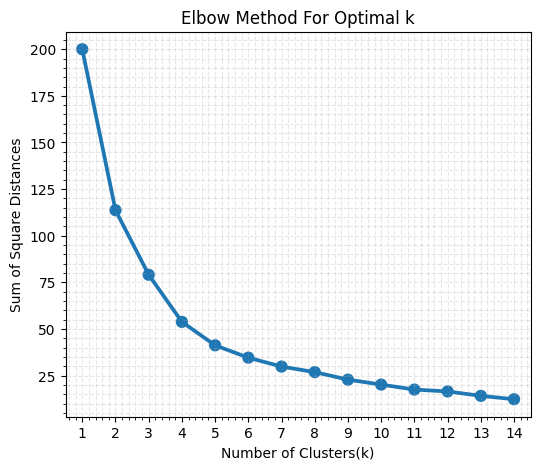

In [139]:

# ML Model - 1 Implementation

# creating a empty dataframe to strore the sillihoutte score for n number of clusters
sill_df = pd.DataFrame(columns=['num_of_cluster','sill_score'])
sum_of_sq_dist = {}

for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_cluster)
    sum_of_sq_dist[k] = km.inertia_
    preds = km.predict(X_cluster)
    if k==1:
      pass
    else:
      score = silhouette_score(X_cluster, preds)
      sill_df.loc[len(sill_df.index)] = [k,score] 
      
#Plot the graph for the sum of square distance values and Number of Clusters
# sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
# plt.xlabel('Number of Clusters(k)')
# plt.ylabel('Sum of Square Distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

# setting the chart size
ax = plt.figure(figsize=(6,5))

# setting the axis label for chart
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))

# ax.set(title=f'Elbow Method For Optimal k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
# adding visualizations to chart
plt.minorticks_on()
plt.grid(which='both',alpha=0.3,linestyle='--')
plt.show()

In [140]:
sill_df

num_of_cluster  sill_score
0              2.0    0.376027
1              3.0    0.376768
2              4.0    0.407566
3              5.0    0.432407
4              6.0    0.415595
5              7.0    0.392230
6              8.0    0.358901
7              9.0    0.379991
8             10.0    0.392850
9             11.0    0.392999
10            12.0    0.360544
11            13.0    0.372238
12            14.0    0.389861

In [141]:
# first_cluster = restaurant_df[restaurant_df['cluster_label'] == 0]
# print(first_cluster['Rating'].mean())
# print(first_cluster['Cost'].mean())

# first_cluster[['Name','Rating','Cost']]

####  Cross- Validation 

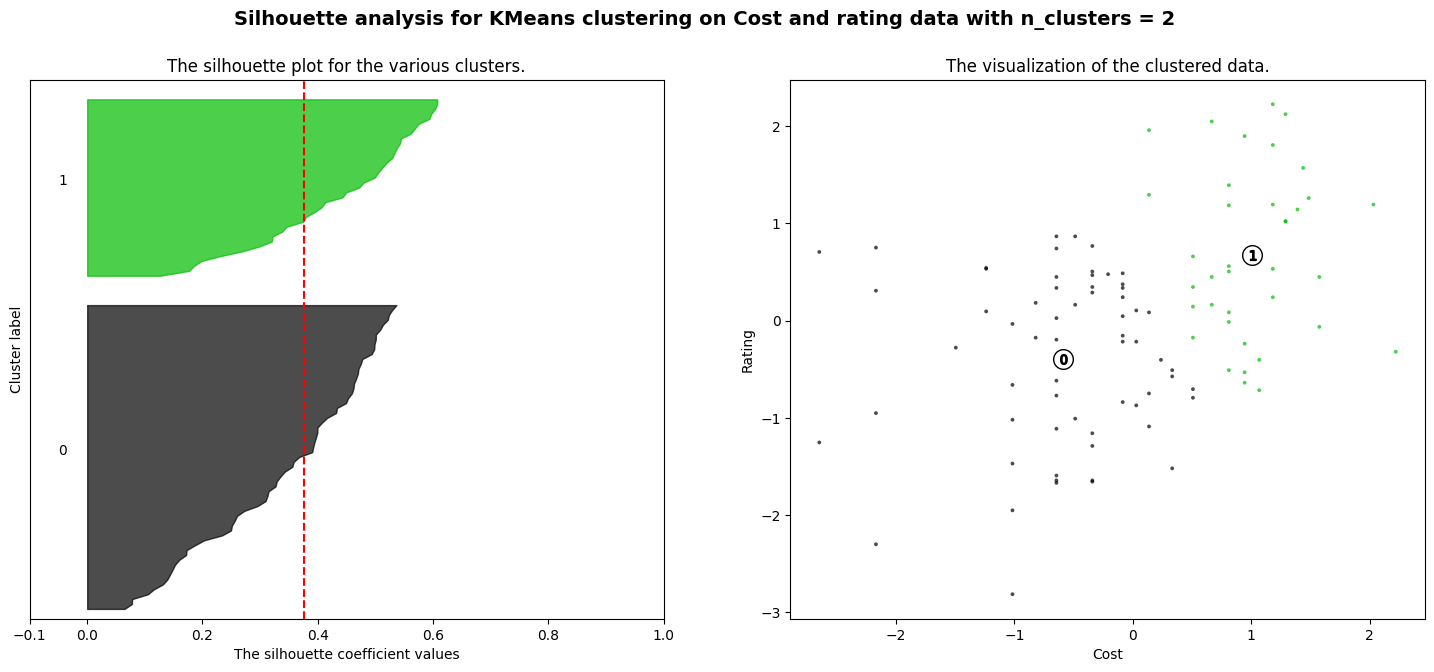

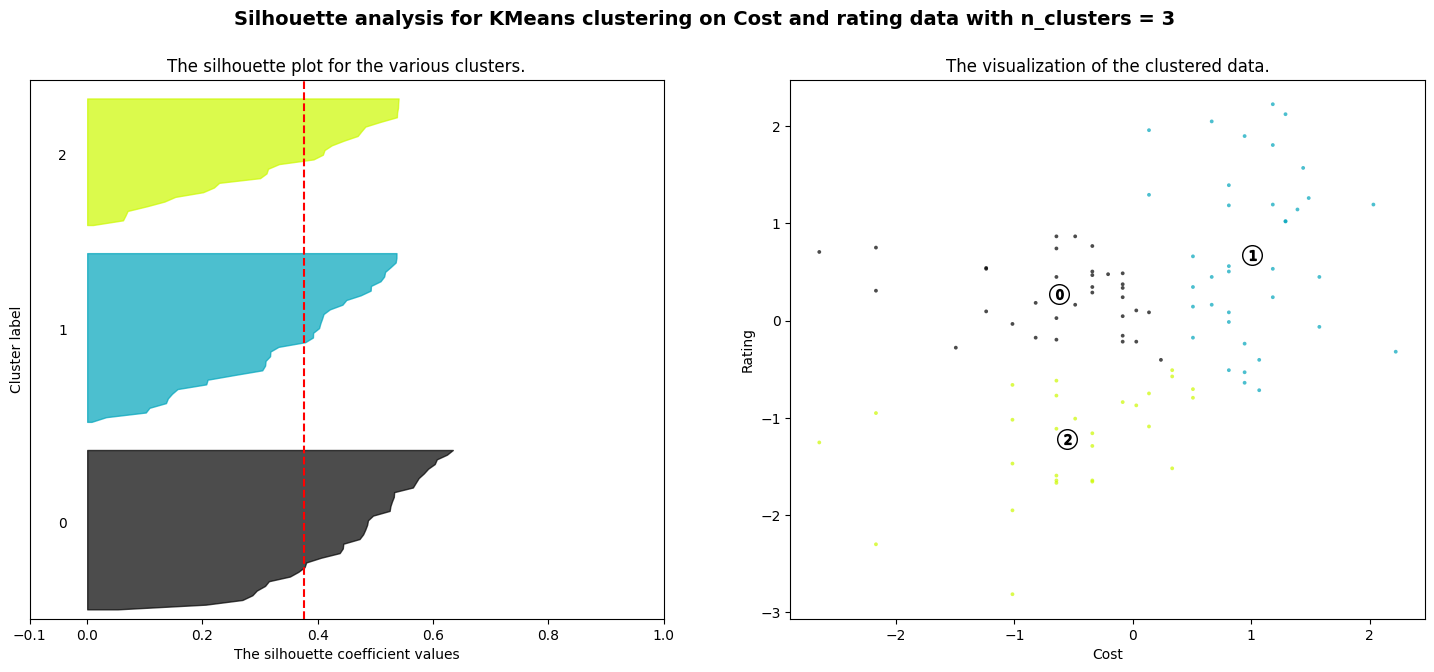

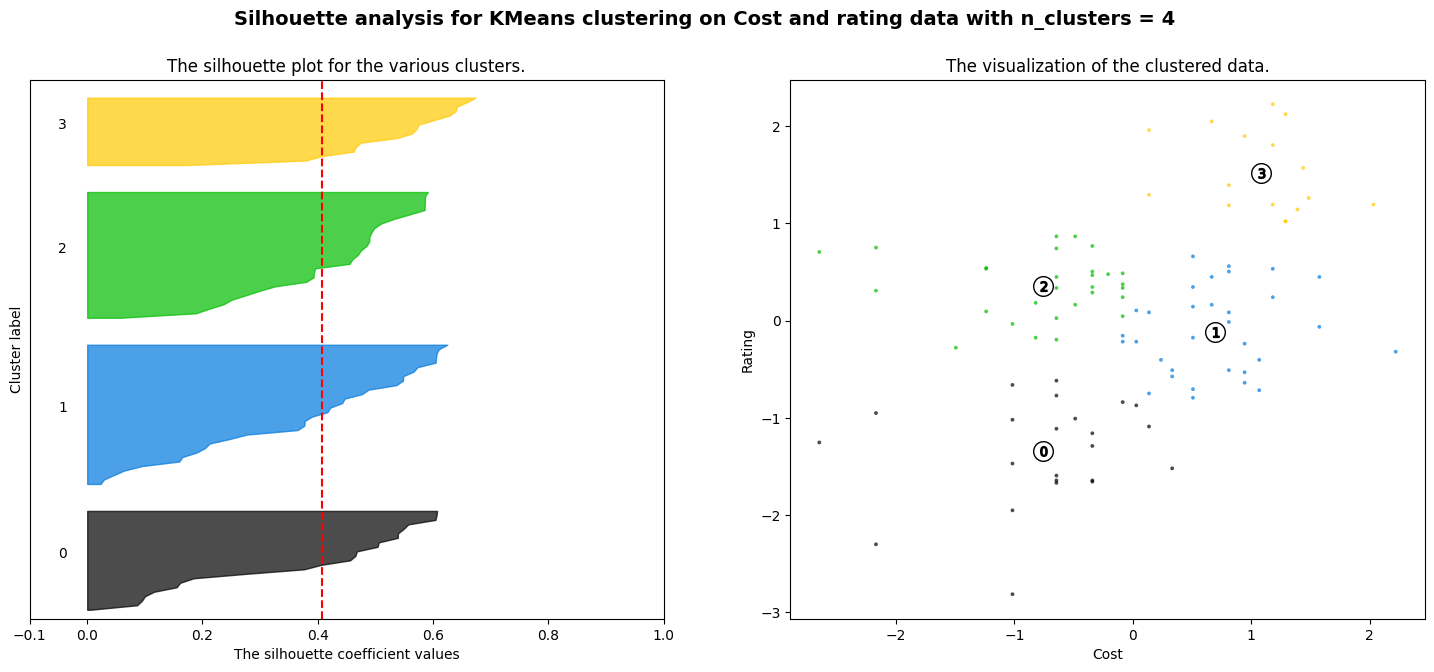

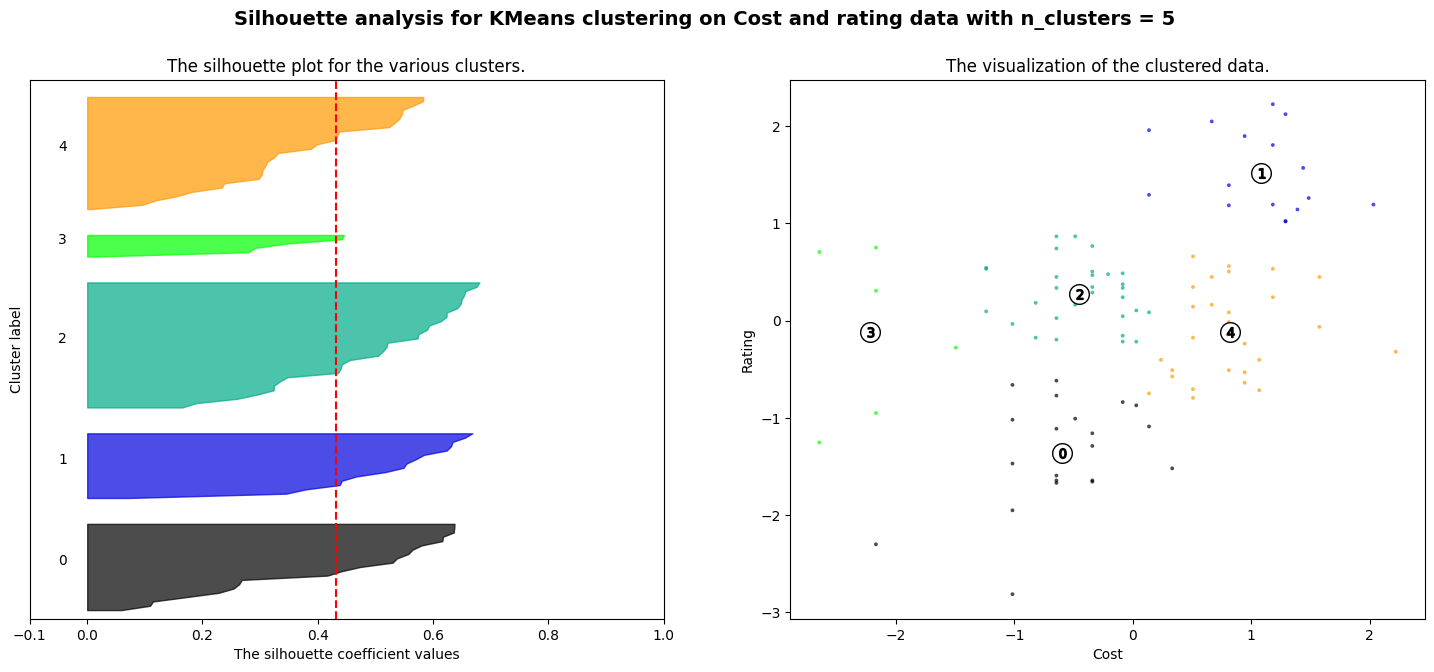

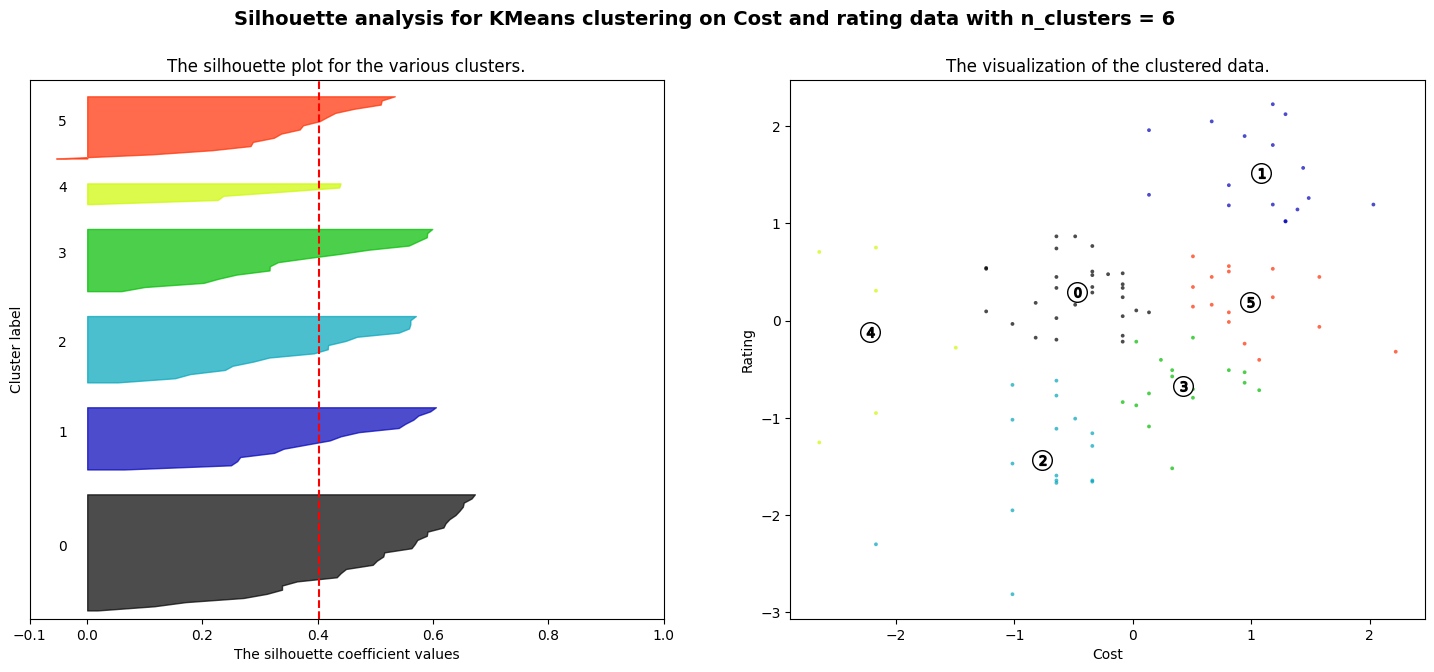

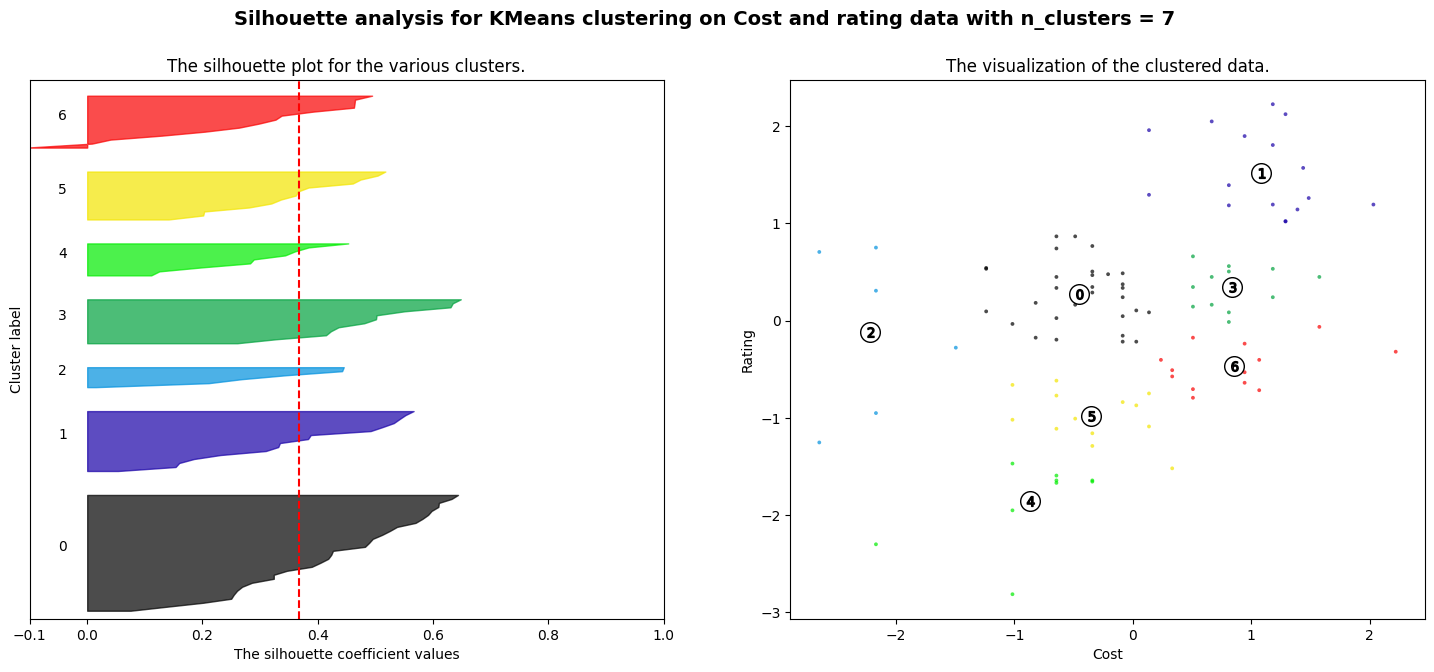

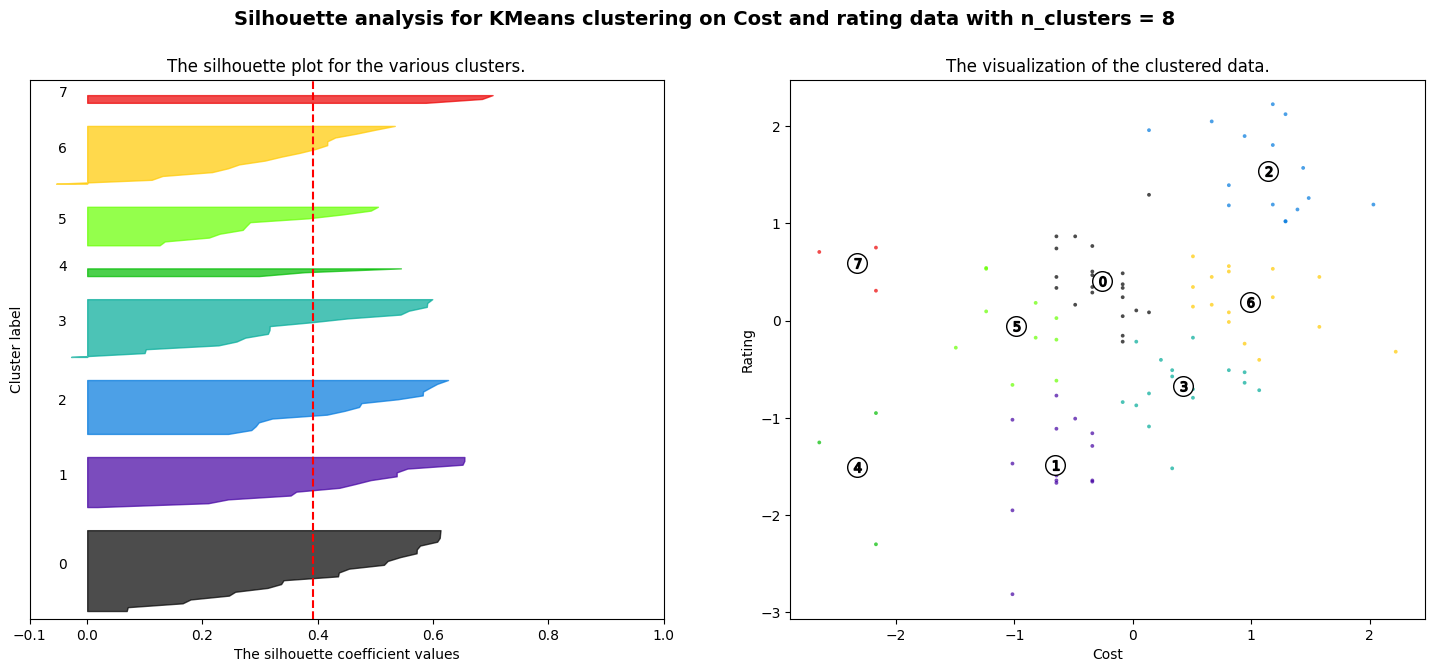

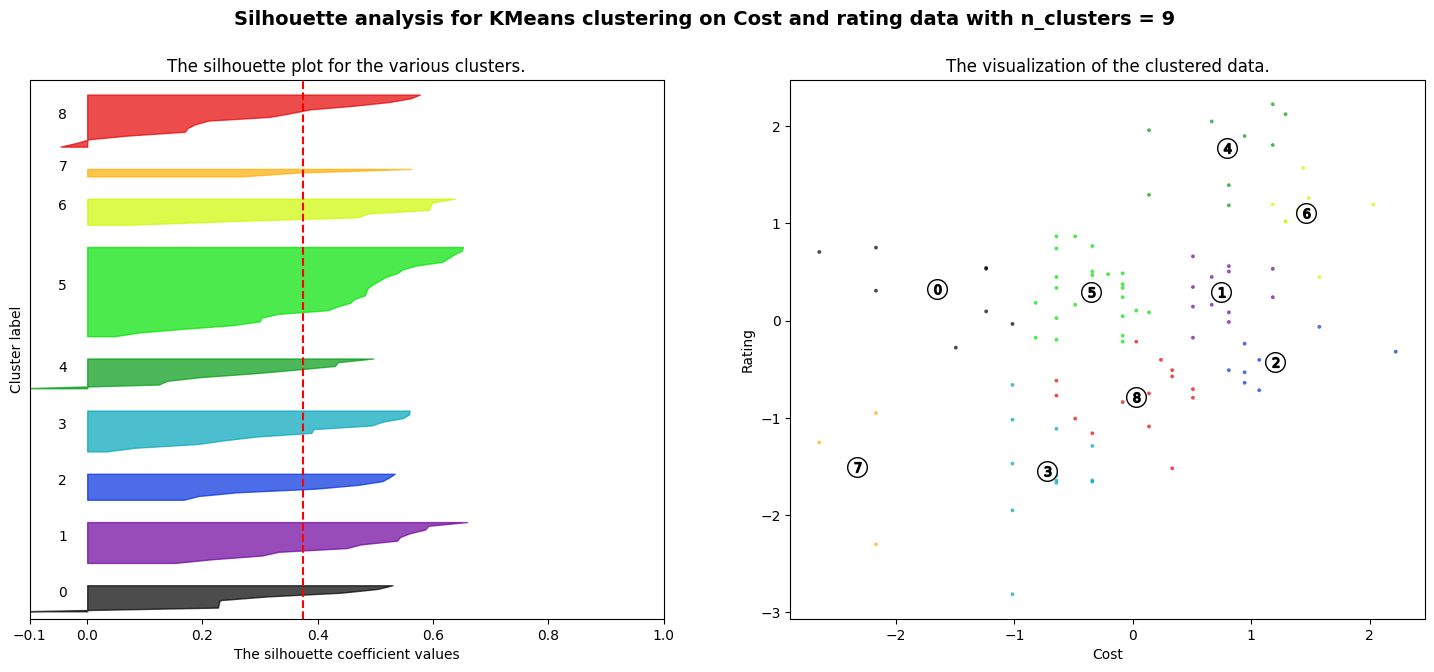

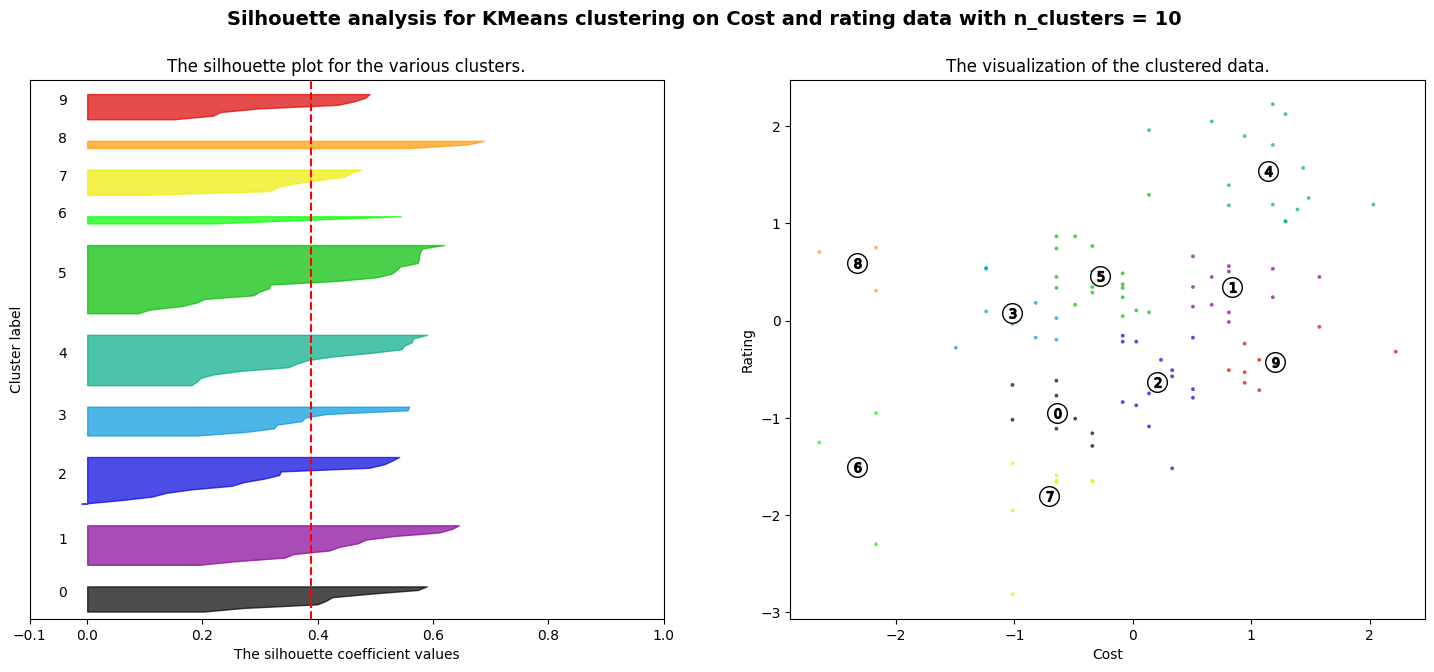

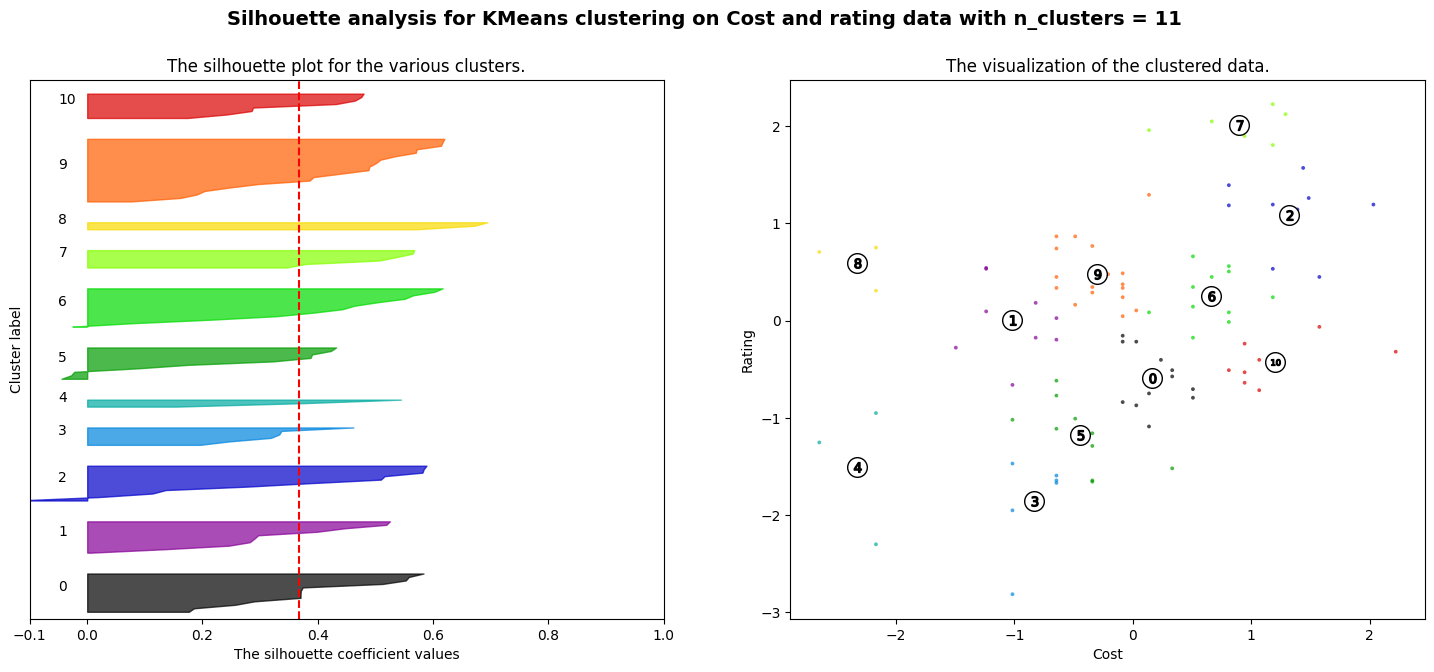

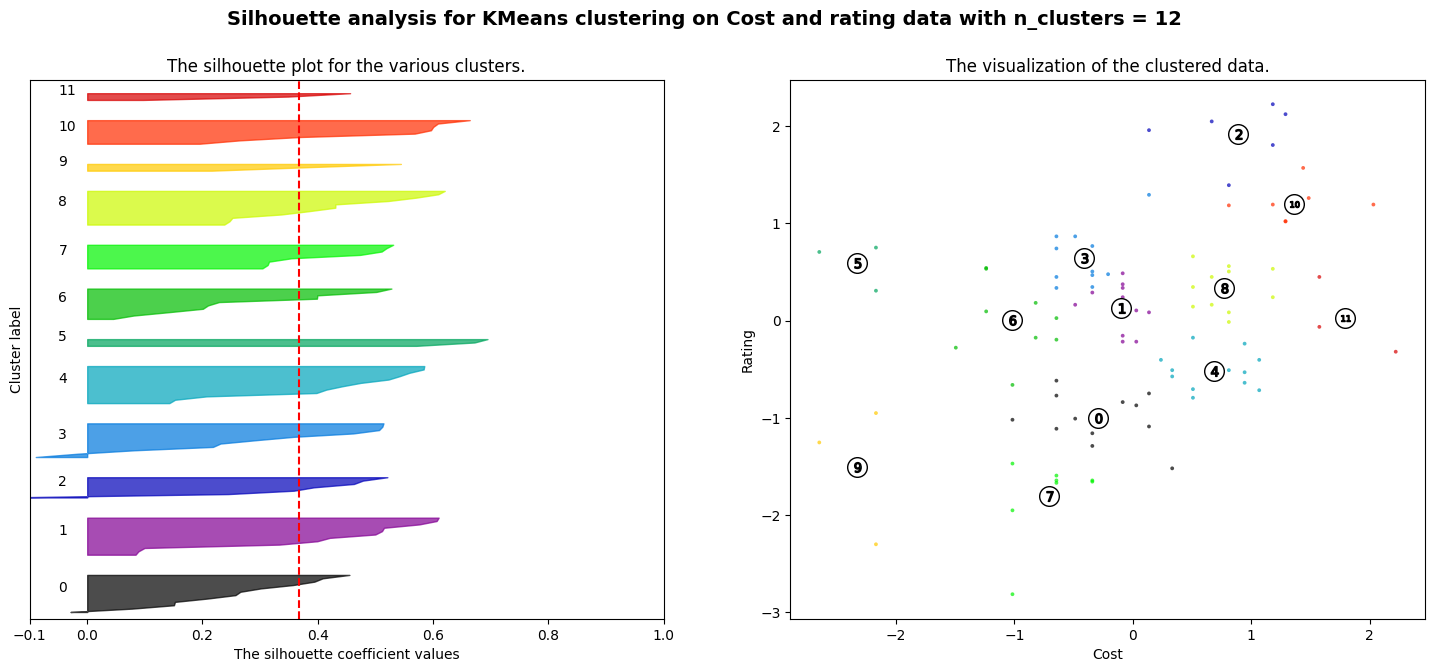

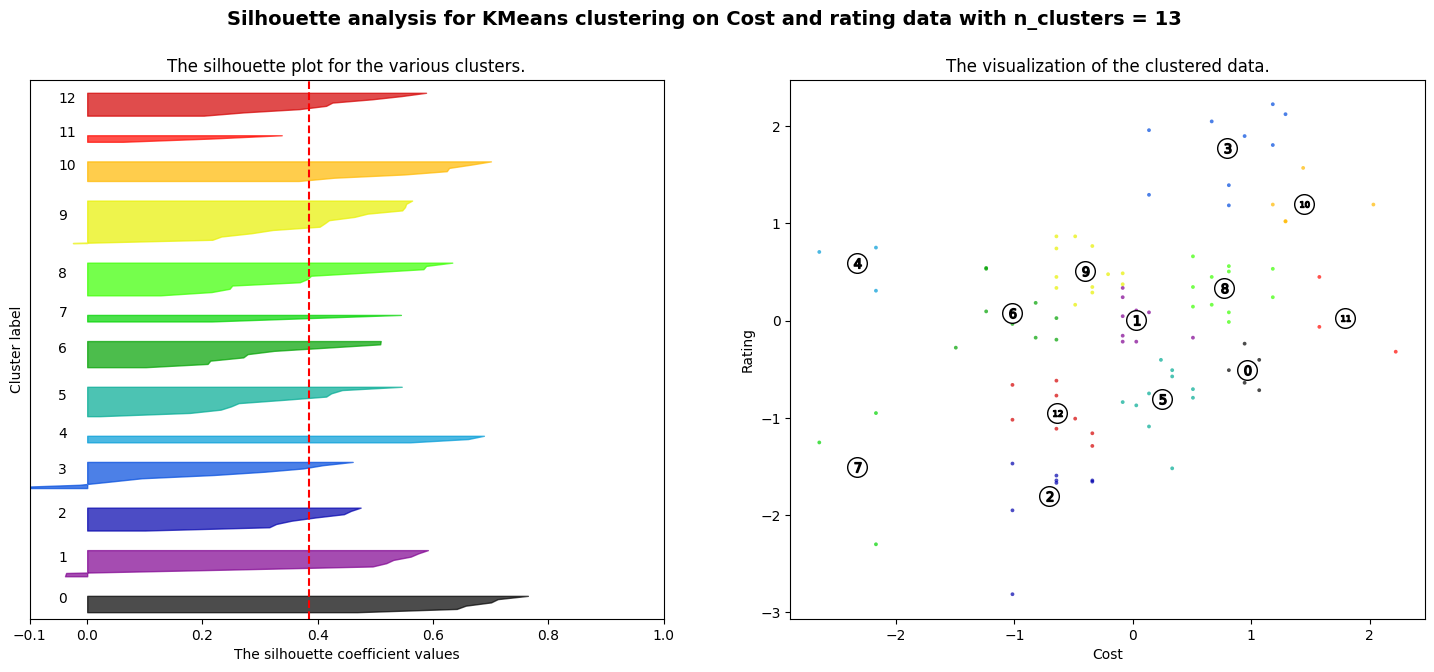

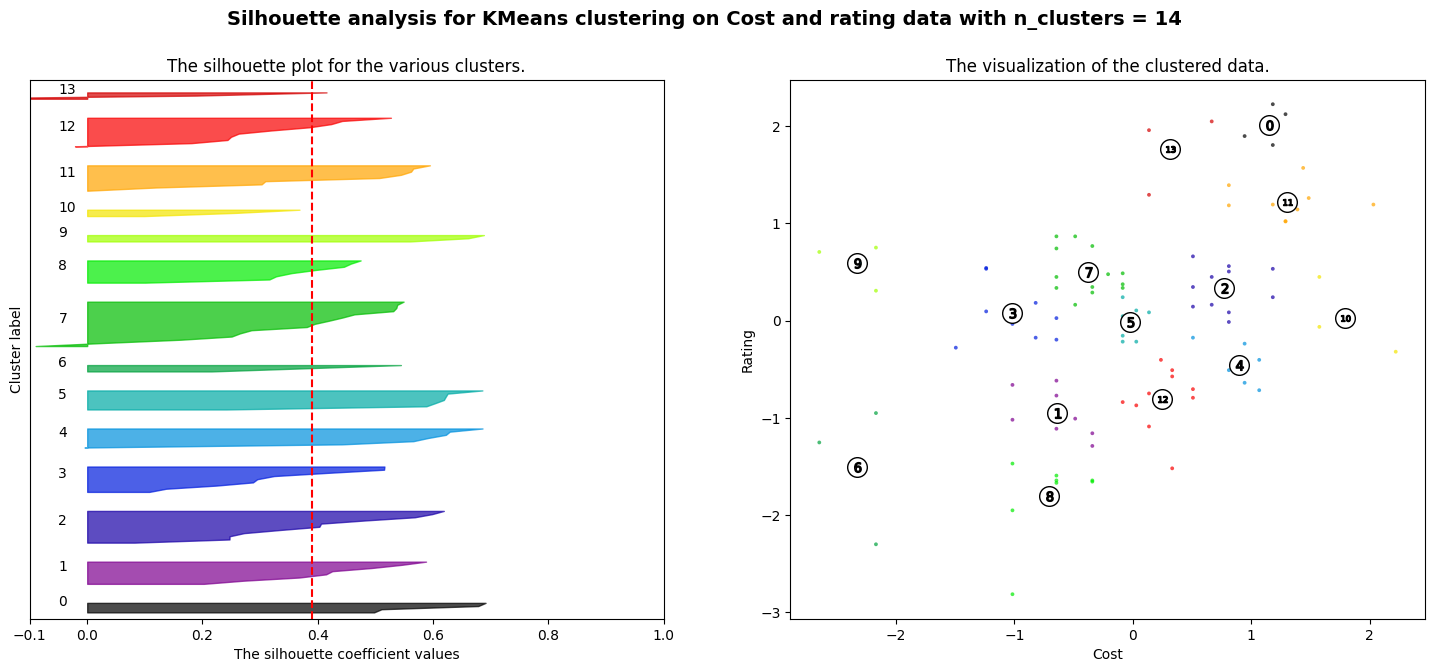

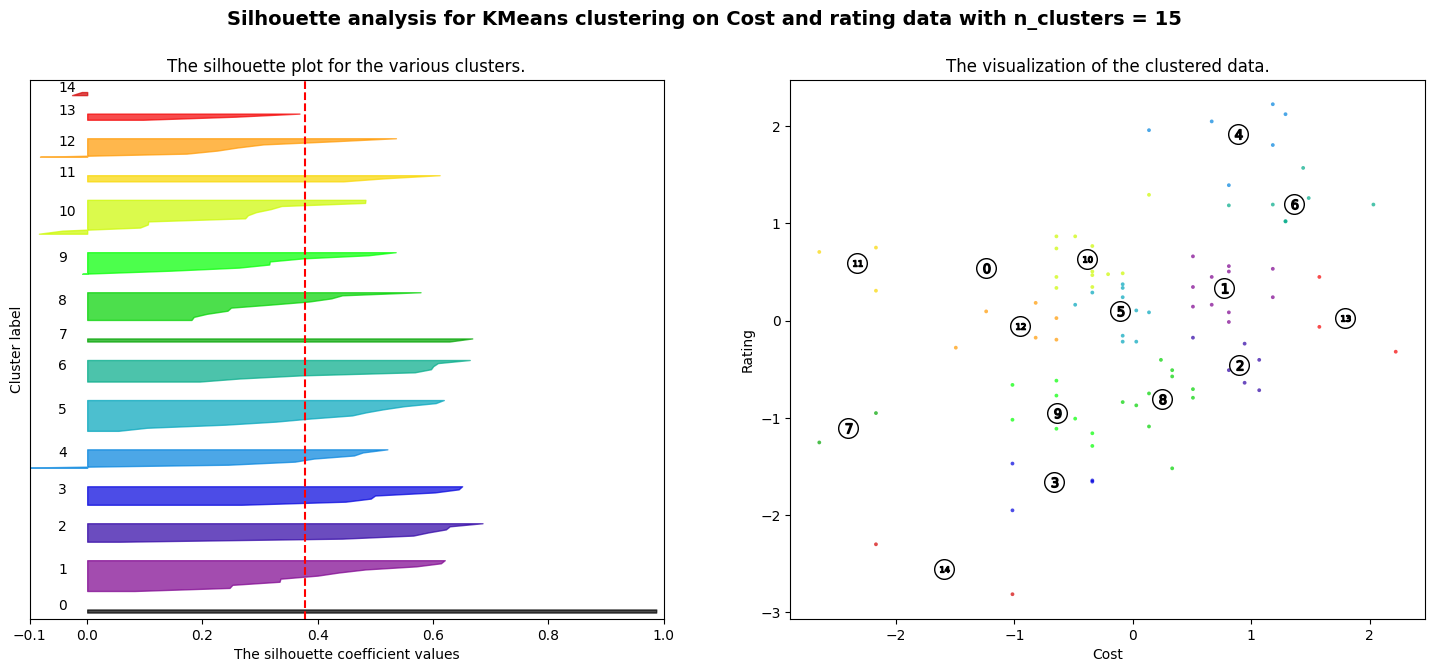

num_of_cluster  sill_score
0              2.0    0.376027
1              3.0    0.376768
2              4.0    0.407566
3              5.0    0.432407
4              6.0    0.415595
5              7.0    0.392230
6              8.0    0.358901
7              9.0    0.379991
8             10.0    0.392850
9             11.0    0.392999
10            12.0    0.360544
11            13.0    0.372238
12            14.0    0.389861

In [142]:
# ML Model - 1 Implementation with Cros Validation

# We absorve the clusters for different values of n and also plot the sillhoutte chart for the same


range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_cluster) + (n_clusters) * 5])

    # Initialize the clusterer with n_clusters value and a random seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    # print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_cluster, cluster_labels)

    y_lower = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 5  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X_cluster[:,0], X_cluster[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Cost")
    ax2.set_ylabel("Rating")
    plt.suptitle(("Silhouette analysis for KMeans clustering on Cost and rating data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
sill_df

##### Which Cross Validation technique have you used and why?

Have plotted sillhoutte plot for various clusters and also have plotted the data points.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing the Sillhoutte score and K elbow graph we found that Number of clusters is 5 is optimum value by k means algorithm.

### ML Model - 2 Aglomerative Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

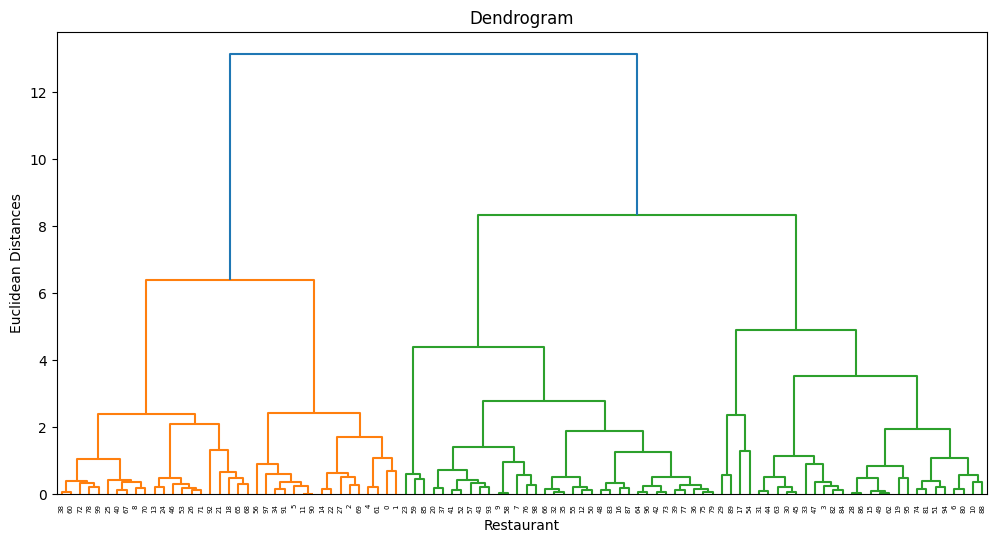

In [143]:
# Using the dendogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X_cluster, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurant')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

#### 2. Cross- Validation & Hyperparameter Tuning

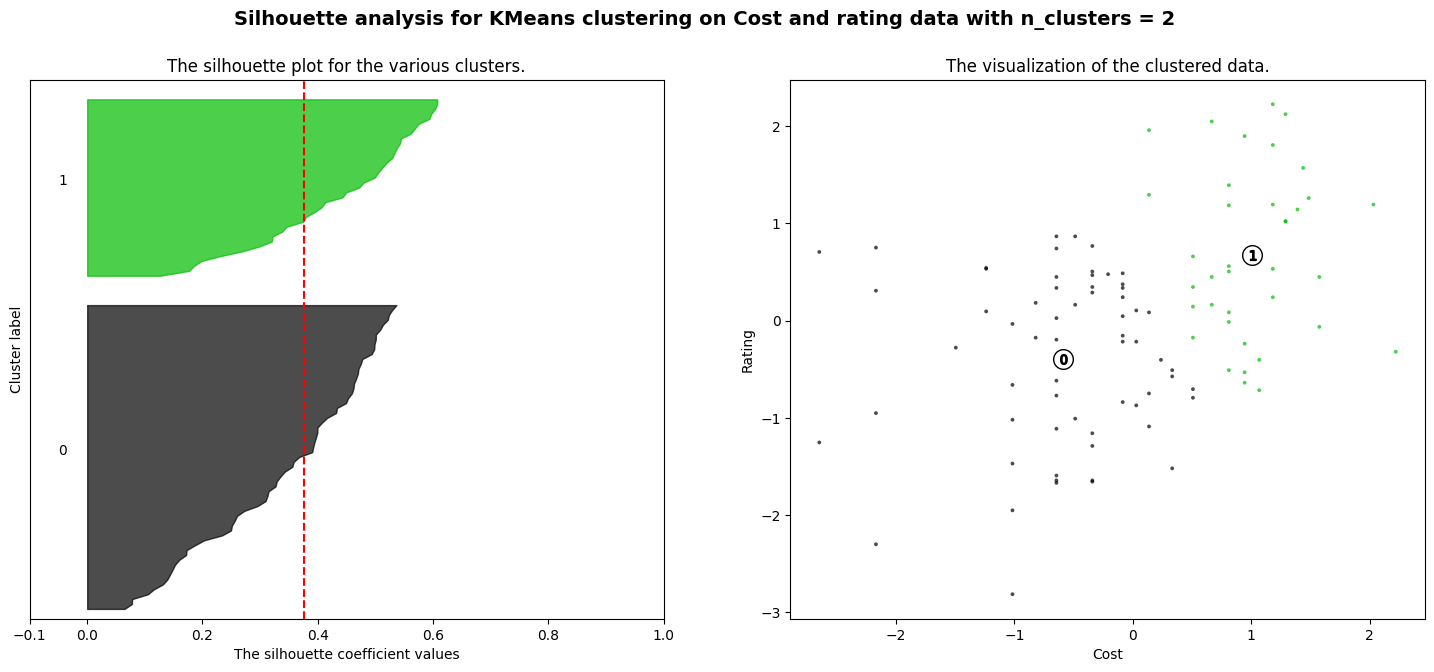

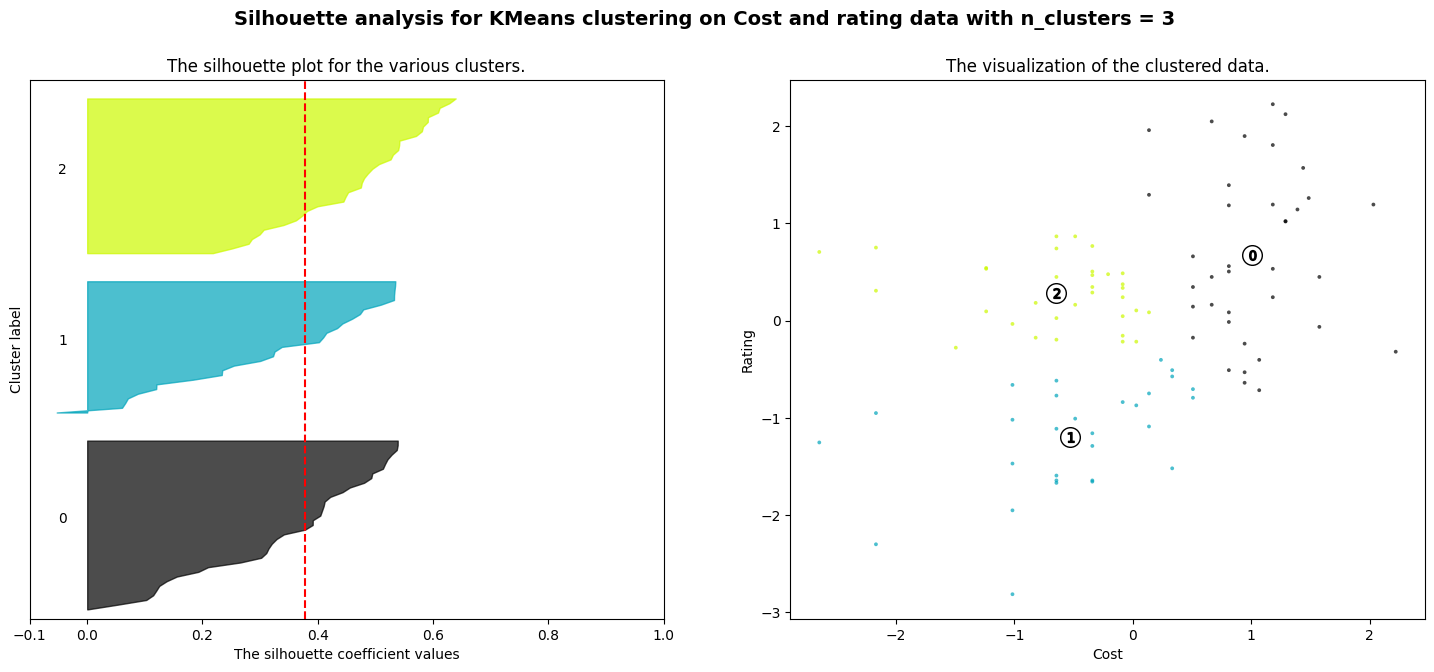

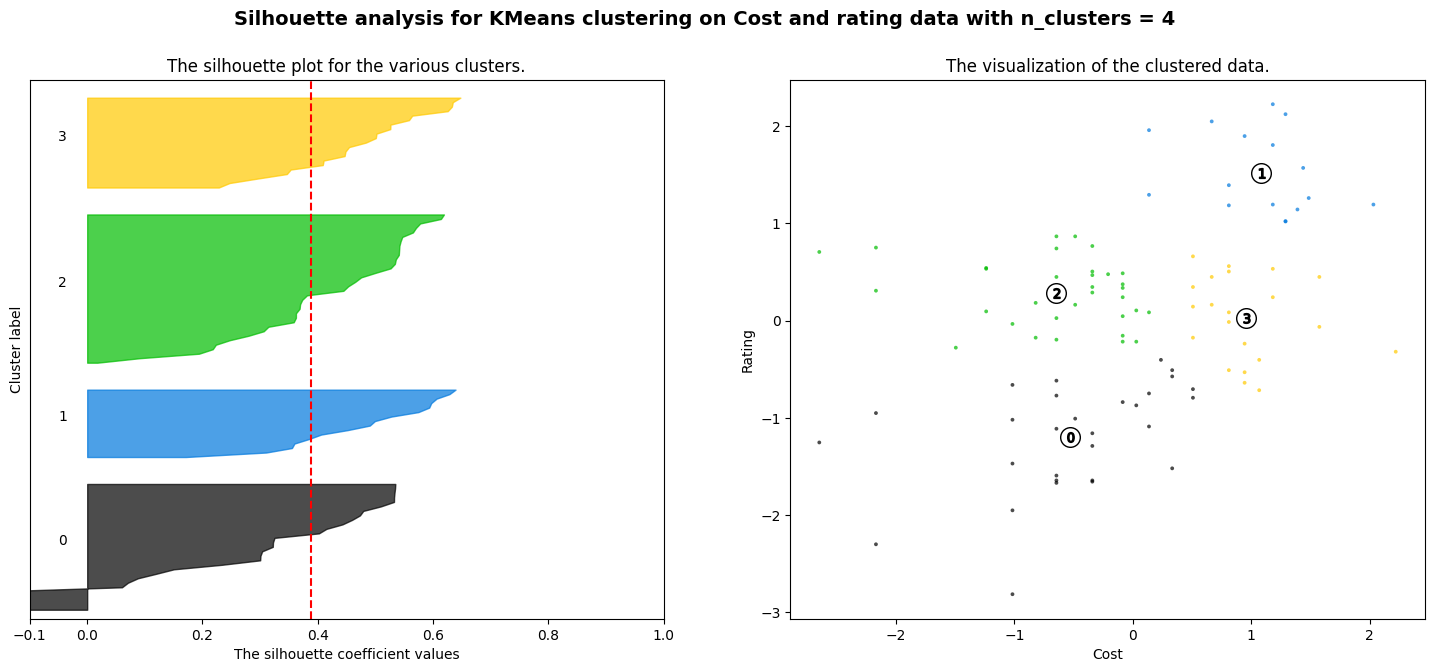

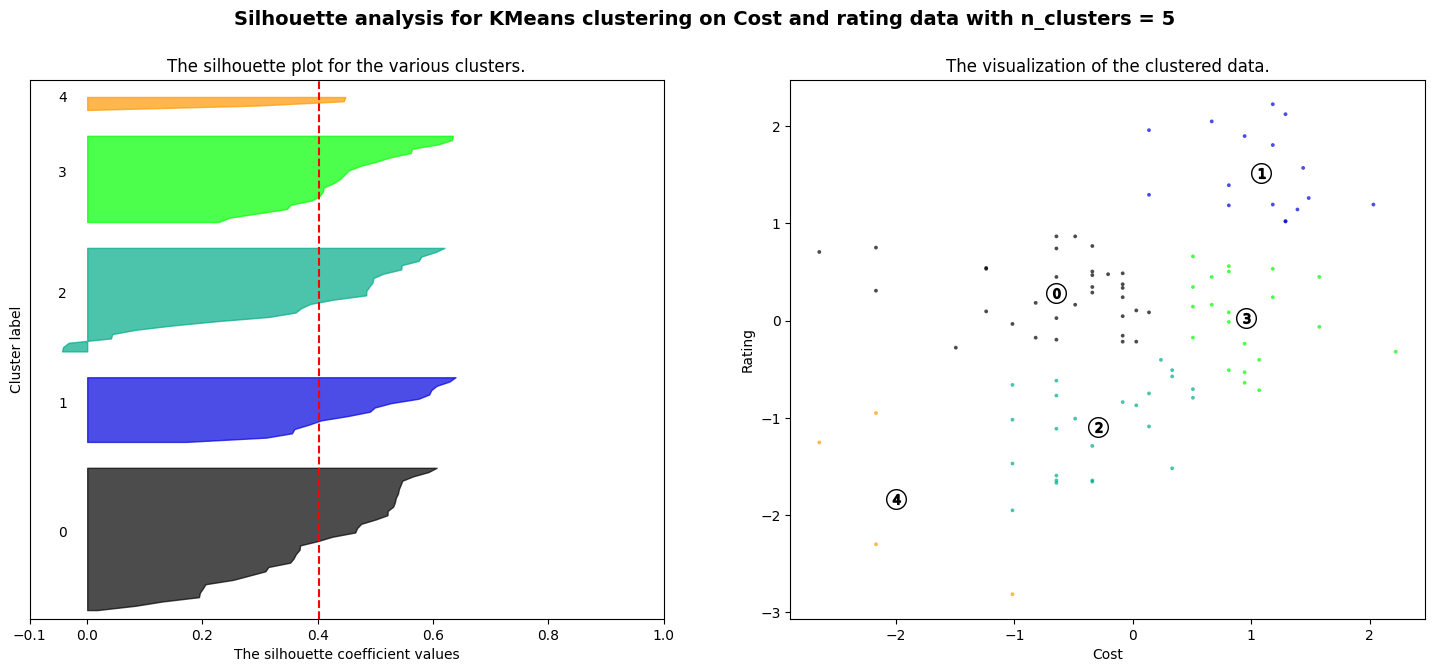

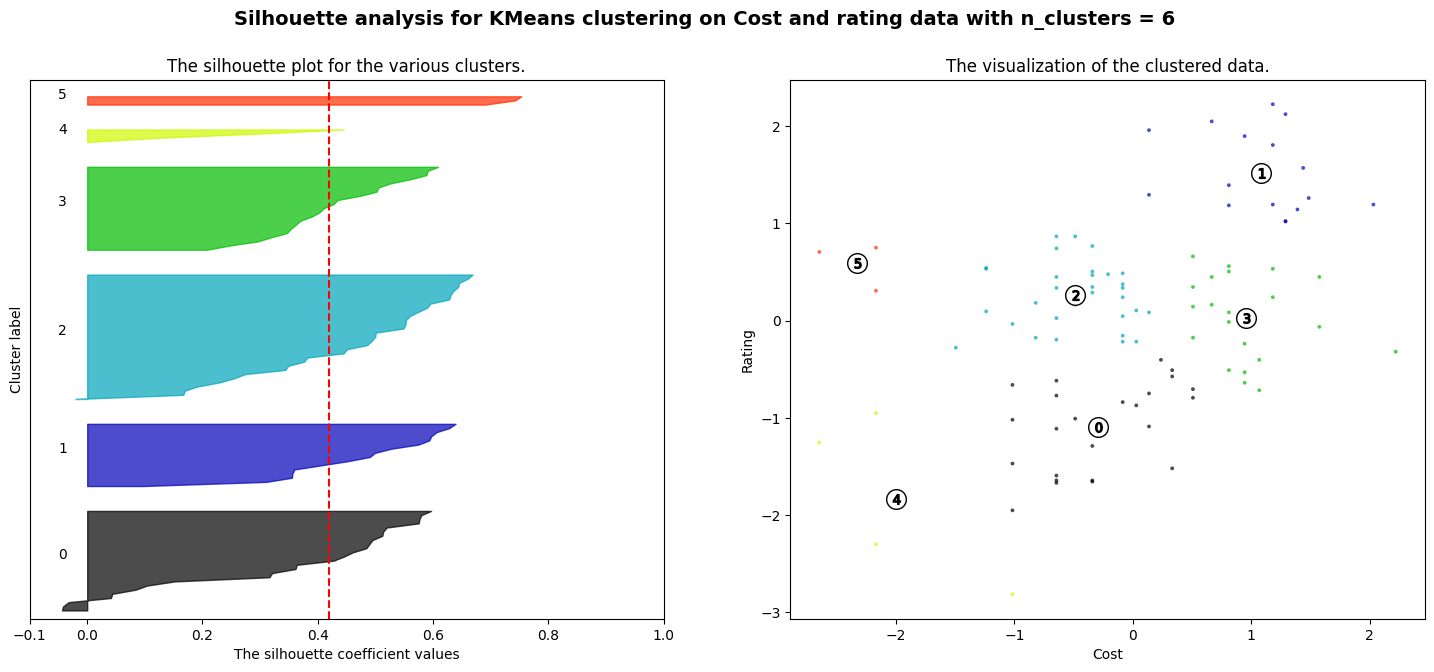

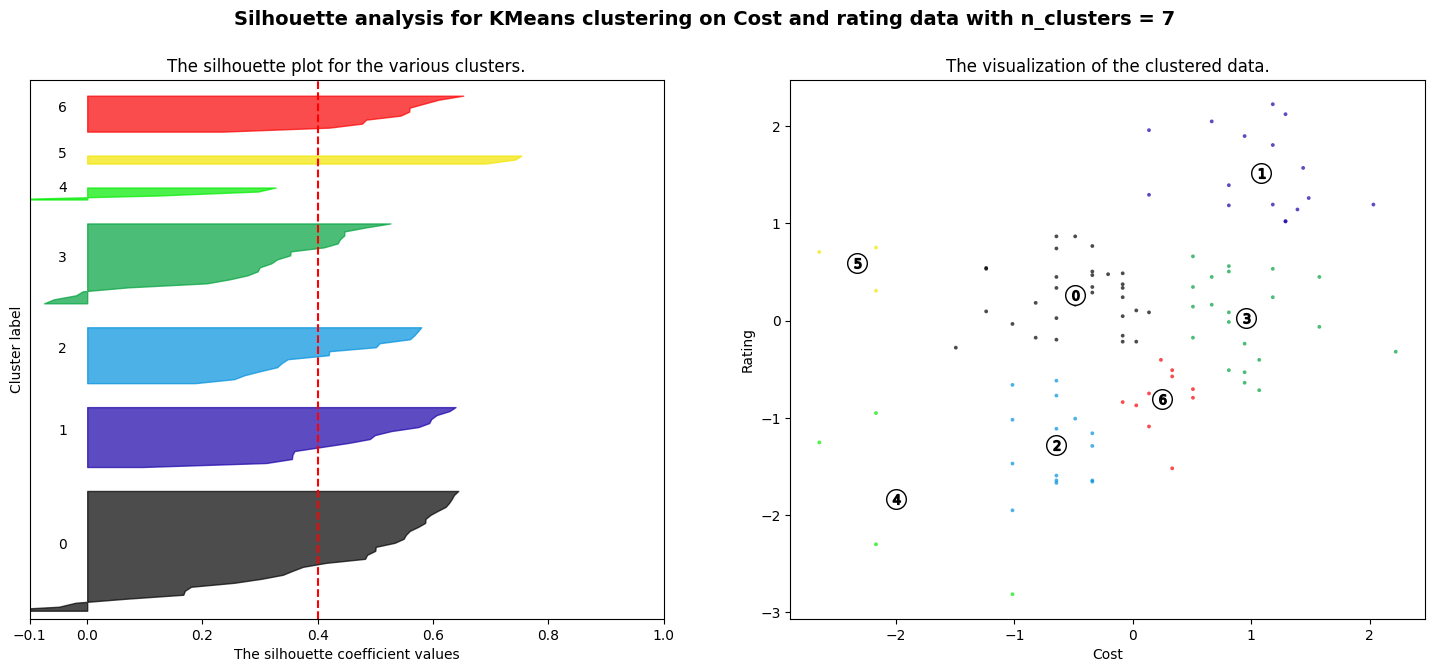

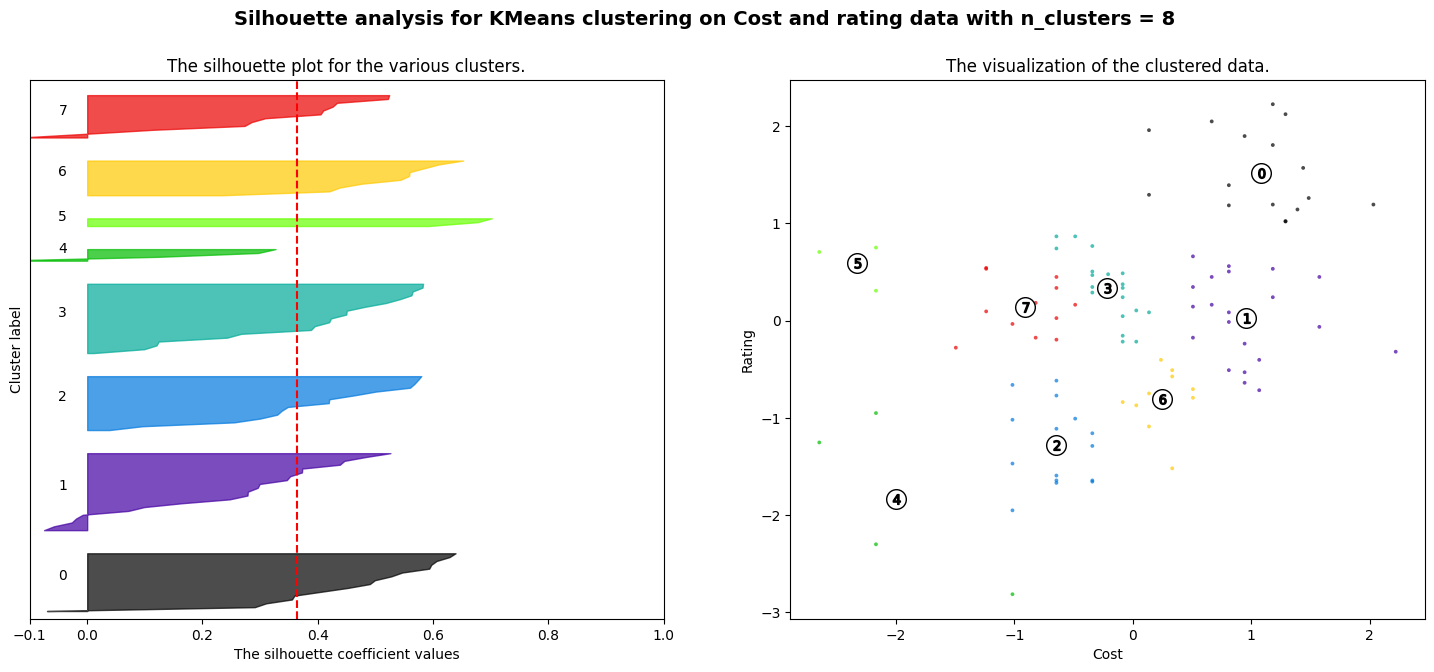

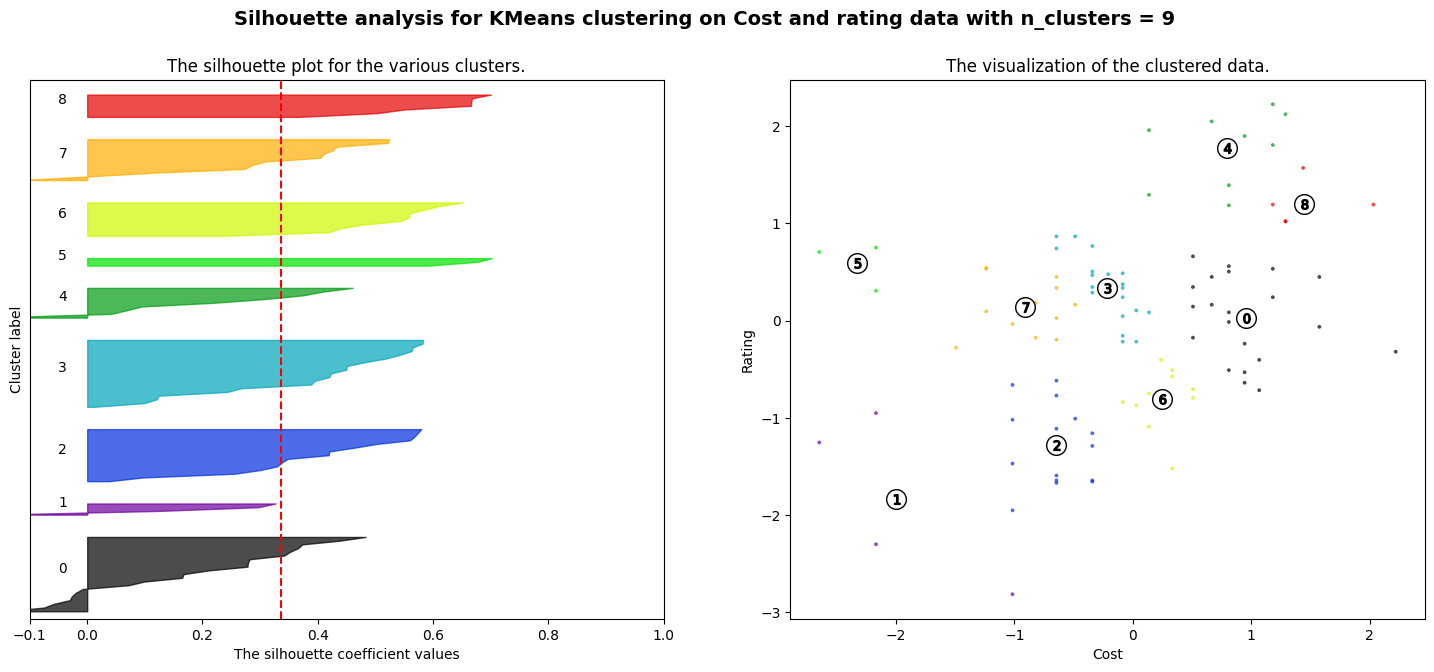

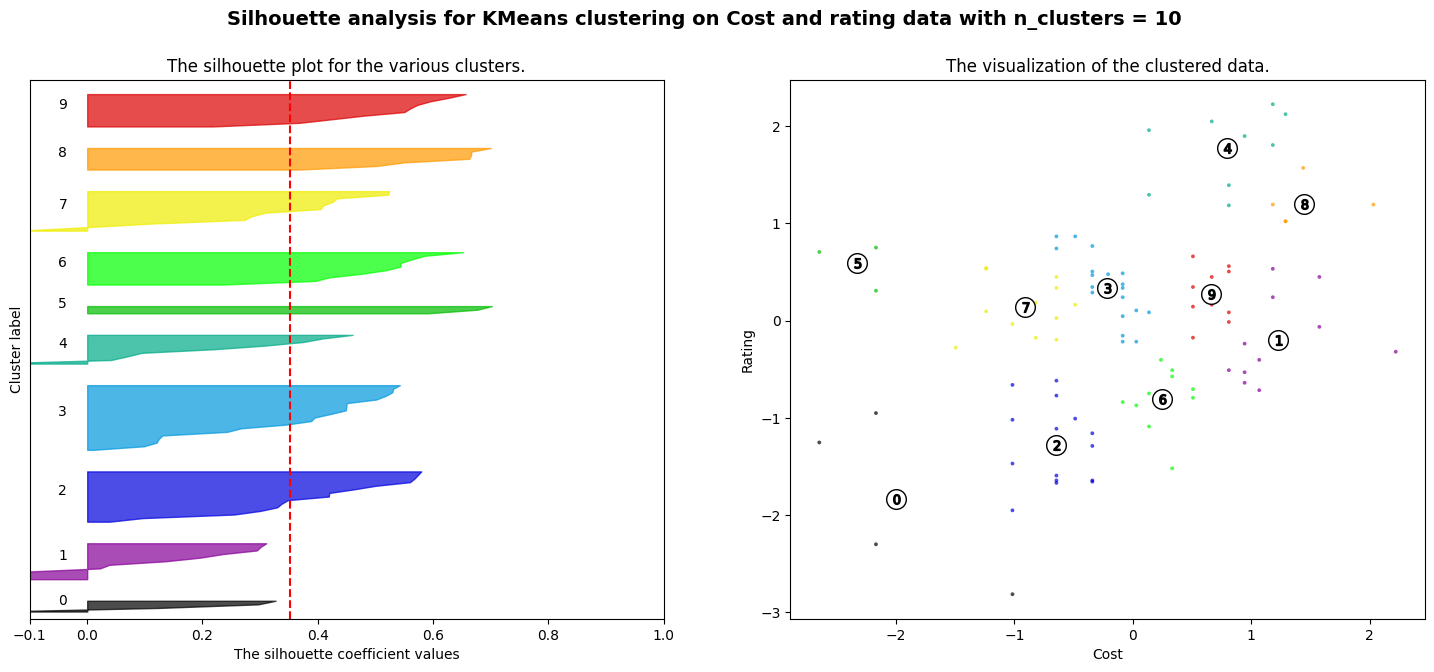

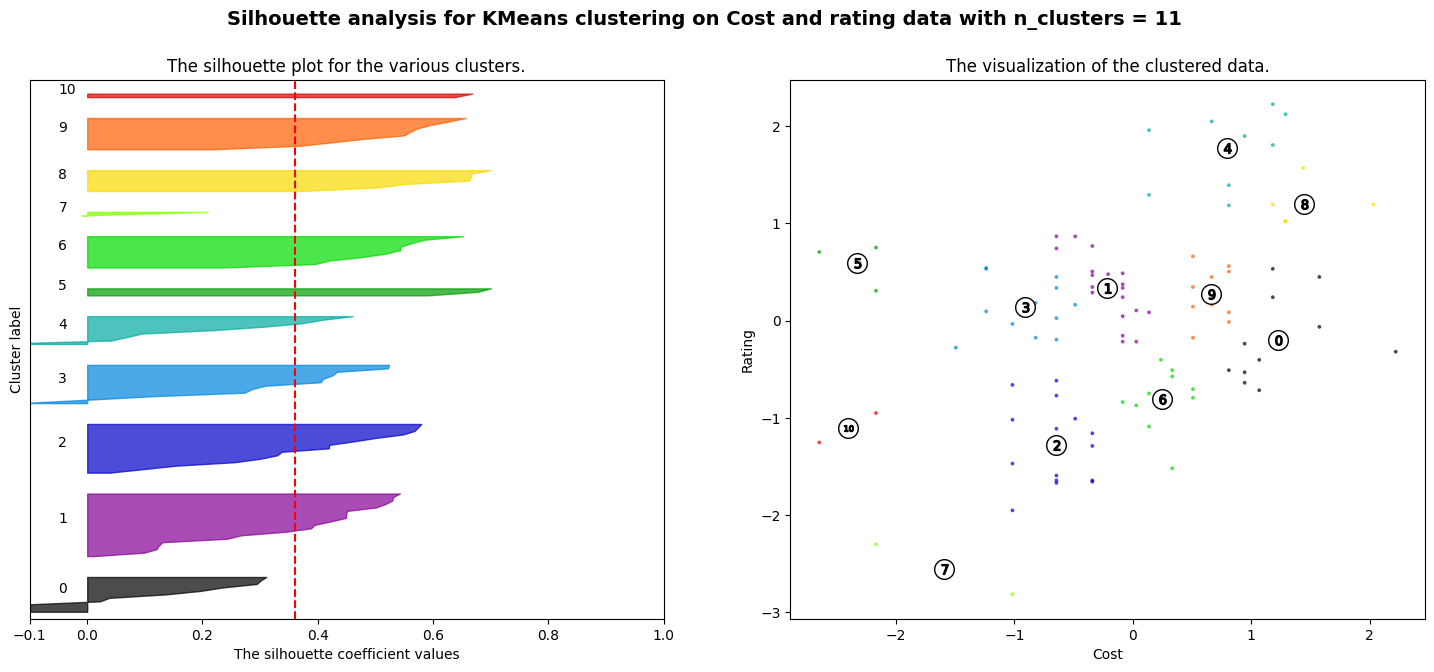

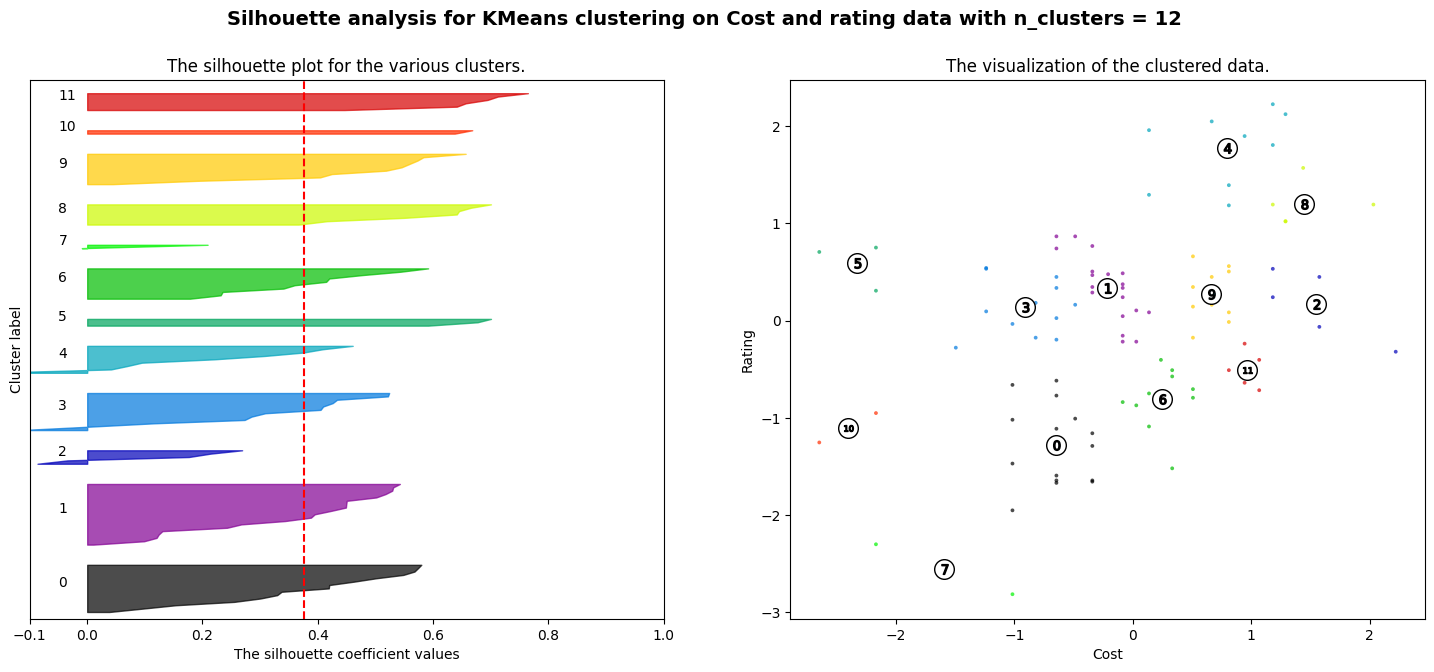

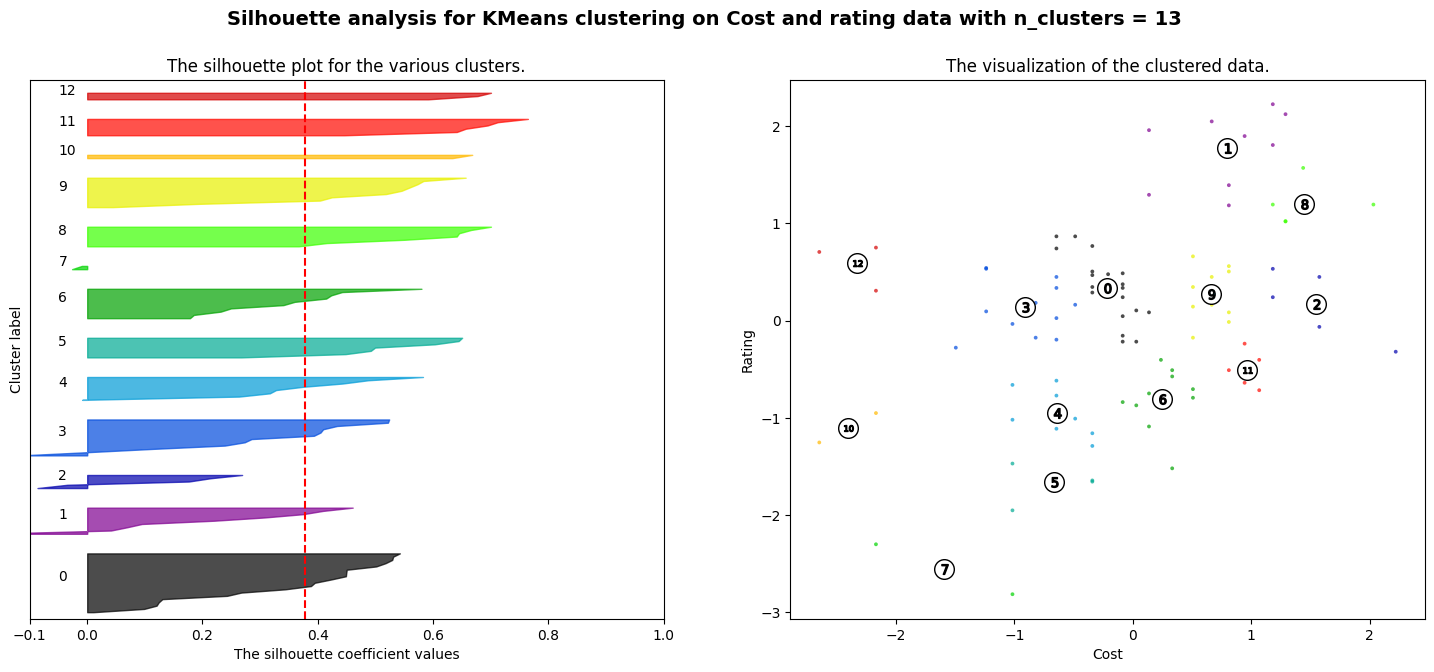

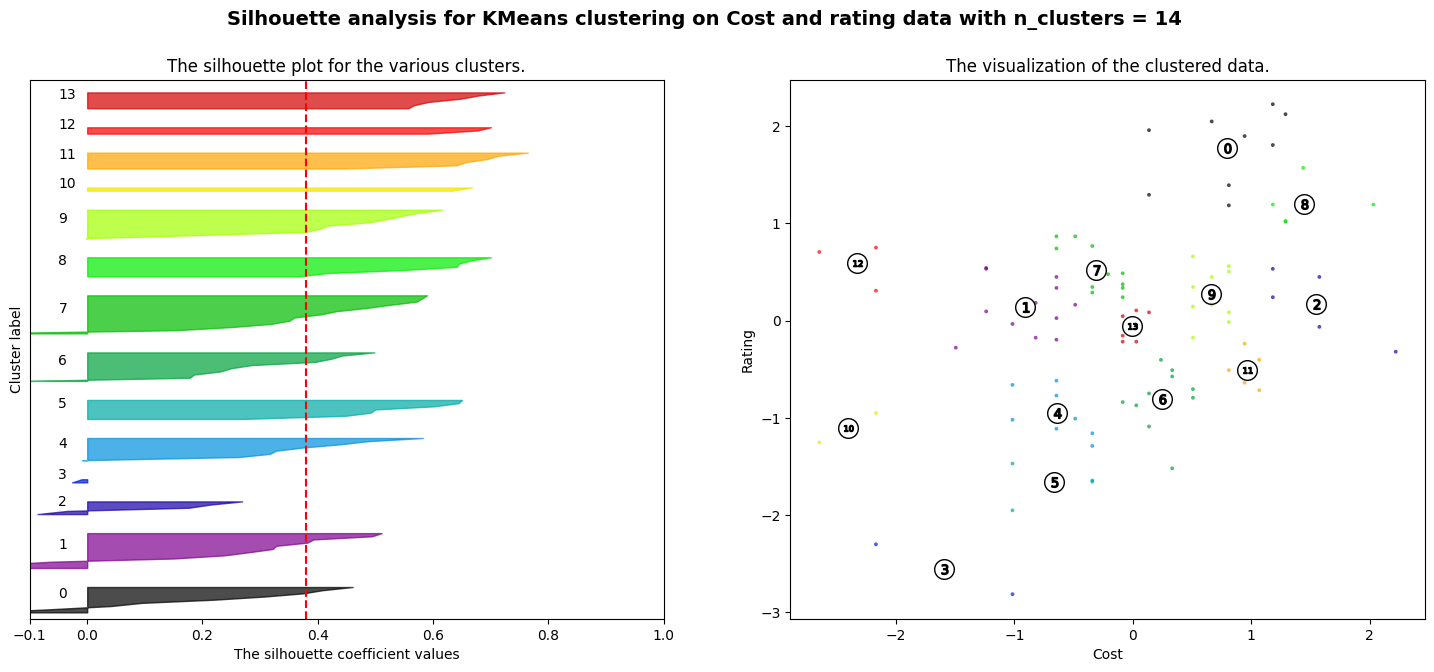

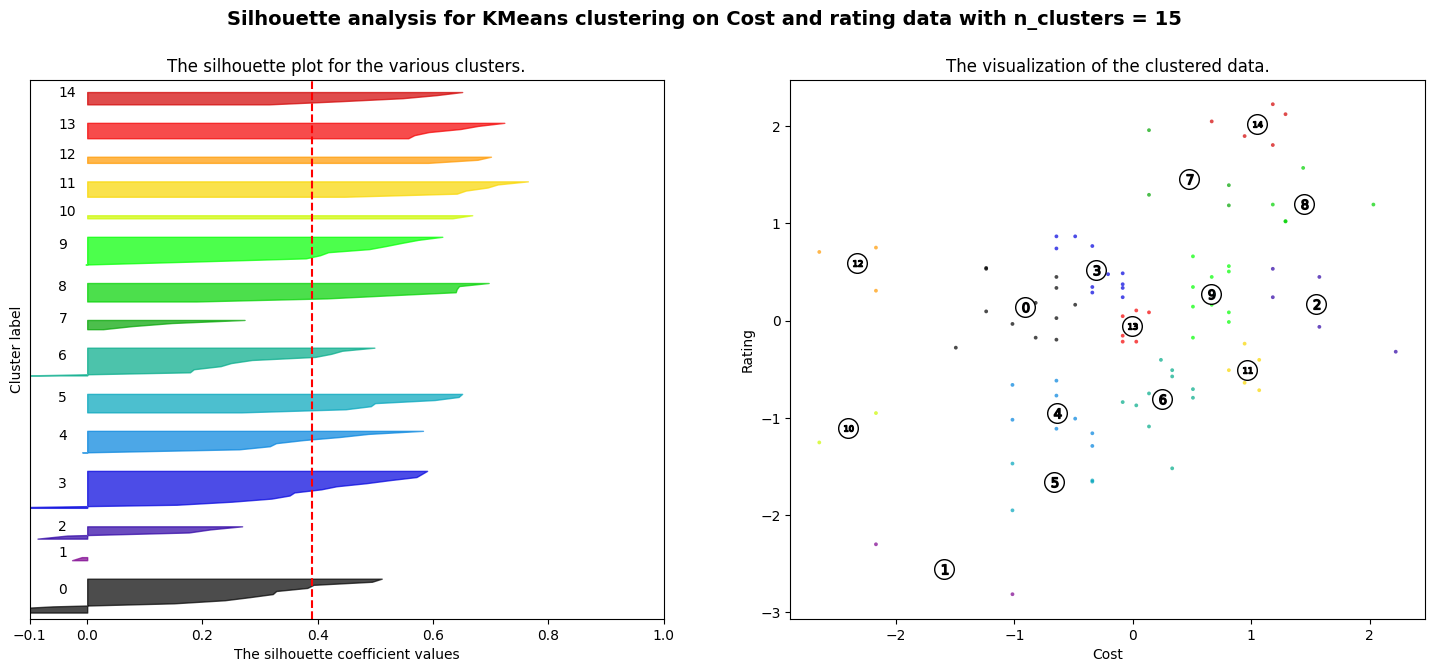

num_of_cluster  sill_score
0              2.0    0.376027
1              3.0    0.376768
2              4.0    0.407566
3              5.0    0.432407
4              6.0    0.415595
5              7.0    0.392230
6              8.0    0.358901
7              9.0    0.379991
8             10.0    0.392850
9             11.0    0.392999
10            12.0    0.360544
11            13.0    0.372238
12            14.0    0.389861

In [144]:
# ML Model - 1 Implementation with cross validation

# Visualizing evaluation Metric Score chart

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_cluster) + (n_clusters) * 5])

    # Initialize the clusterer with n_clusters value and a random seed of 10 for reproducibility.
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)

    from sklearn.cluster import AgglomerativeClustering
    clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    # y_hc = hc.fit_predict(X)
    cluster_labels = clusterer.fit_predict(X_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
    # print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_cluster, cluster_labels)

    y_lower = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 5  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X_cluster[:,0], X_cluster[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    # Get the cluster labels
    labels = clusterer.labels_
    # Initialize an empty array to store the cluster centers
    cluster_centers = np.zeros((n_clusters, 2))
    # Loop over the clusters
    for i in range(n_clusters):
        # Get the points belonging to cluster i
        points = X_cluster[labels == i]
        # Compute the mean of the points
        mean = np.mean(points, axis=0)
        # Store the mean as the cluster center
        cluster_centers[i] = mean
    # centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(cluster_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Cost")
    ax2.set_ylabel("Rating")
    plt.suptitle(("Silhouette analysis for KMeans clustering on Cost and rating data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
sill_df

##### Which Cross validation technique have you used and why?

Have plotted sillhoutte plot for various clusters and also have plotted the data points.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Using dendogram and visalizing the cluster and also from Sillohtte score we can say that number of cluster = 6  is a optimum value for our Data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have Considered Sillohette Score for evaluation as it helps to clearly identify the distribution of clusters. Also, Silhoutte score of each sample tell us the distribution of cluster points to its cluster center.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have Selected Algomerative Clustering with number of clusters = 6 as it clearly clusters all the restaurant according to the business need.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We have clustered the restaurant according to Cost Vs benefit analysis, into 6 clusters.

* Low Cost - Low rating
* Low Cost - Average Rating
* Avg Cost - Low rating
* Avg Cost - High Rating
* High Cost - High rating
* High Cost - Low ratings

In [145]:
res_df = restaurant_df[['Name','Cost','Rating']]

In [146]:
res_df.dropna(inplace=True)

In [147]:
# implementing the Algorithm
clusterer = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')

# Predicting the class of the restaurant
res_df['cluster_label'] = clusterer.fit_predict(X_cluster)

In [148]:
label_0 = res_df[res_df['cluster_label']==0]
label_0[['Name','Cost','Rating']].head()

Name  Cost  Rating
3   Shah Ghouse Hotel & Restaurant   800    3.21
6                          eat.fit   500    3.20
10        Sardarji's Chaats & More   400    3.25
15                             KFC   500    2.85
19                   Pakwaan Grand   400    2.71

In [149]:
label_1 = res_df[res_df['cluster_label']==1]
label_1[['Name','Cost','Rating']].head()

Name  Cost  Rating
0             Beyond Flavours   800    4.28
1                    Paradise   800    4.70
2                    Flechazo  1300    4.66
4  Over The Moon Brew Company  1200    4.34
5       The Fisherman's Wharf  1500    4.22

In [150]:
label_2 = res_df[res_df['cluster_label']==2]
label_2[['Name','Cost','Rating']].head()

Name  Cost  Rating
7   Shah Ghouse Spl Shawarma   300   3.430
9                Cream Stone   350   3.845
12         Absolute Sizzlers   750   3.620
16       NorFest - The Dhaba   550   4.030
20                  13 Dhaba   450   3.480

In [151]:
label_3 = res_df[res_df['cluster_label']==3]
label_3[['Name','Cost','Rating']].head()

Name  Cost  Rating
8                                         Hyper Local  1000   3.640
13                      The Lal Street - Bar Exchange  1300   3.450
18                                  10 Downing Street  1900   3.800
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900   3.535
24                                              SKYHY  1400   3.370

In [152]:
label_4 = res_df[res_df['cluster_label']==4]
label_4[['Name','Cost','Rating']].head()

Name  Cost  Rating
17     Hotel Zara Hi-Fi   400    2.40
29   Hunger Maggi Point   200    3.12
54       Asian Meal Box   200    2.58
89  Mohammedia Shawarma   150    2.99

In [153]:
label_5 = res_df[res_df['cluster_label']==5]
label_5[['Name','Cost','Rating']].head()

Name  Cost  Rating
23           Amul   150   3.940
59      KS Bakers   200   3.965
85  Momos Delight   200   3.725

Defining the labels for Business Understanding.

* Low Cost - Low rating   ==> cluster label = 4
* Low Cost - Average Rating   ==> cluster label = 5
* Avg Cost - Low rating   ==> cluster label = 0
* Avg Cost - High Rating   ==> cluster label = 2
* High Cost - High rating   ==> cluster label = 1
* High Cost - Low ratings   ==> cluster label = 3

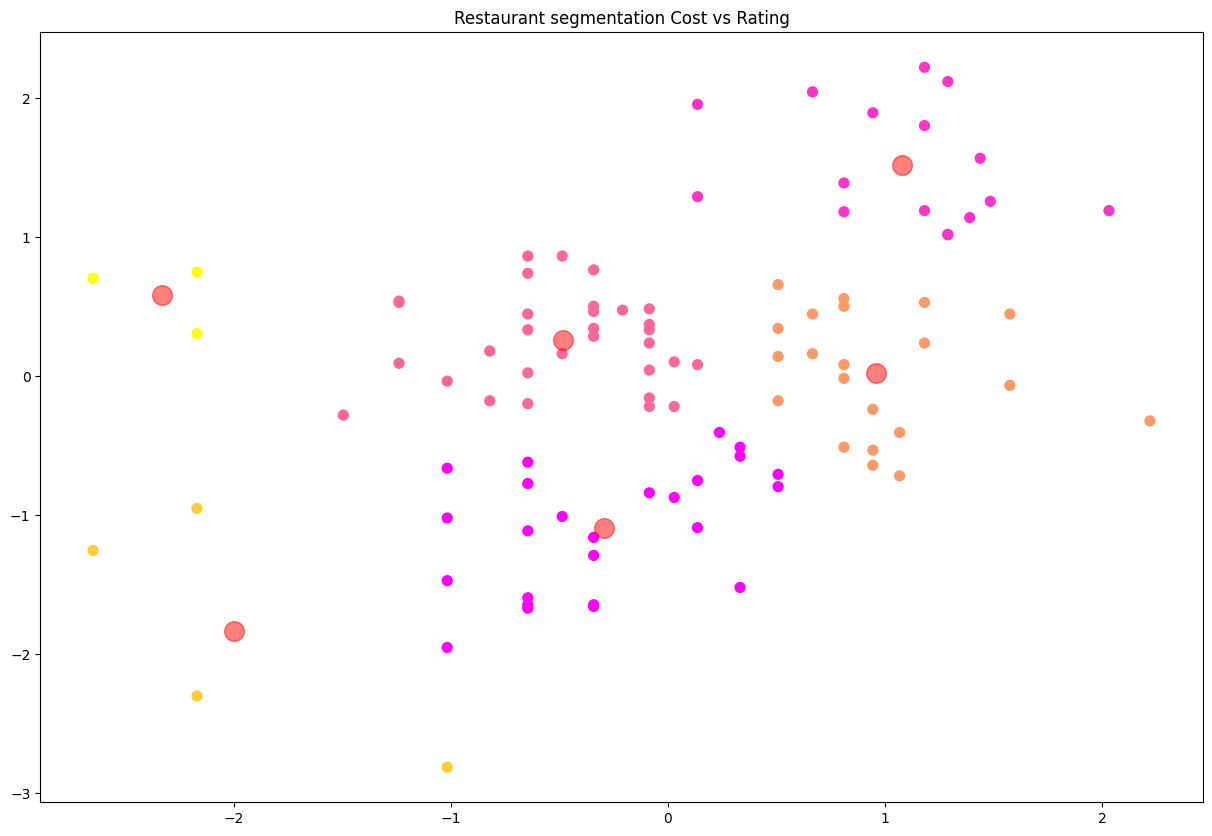

In [154]:
labels = clusterer.labels_
# Initialize an empty array to store the cluster centers
cluster_centers = np.zeros((6, 2))

for i in range(6):
    # Get the points belonging to cluster i
    points = X_cluster[labels == i]
    # Compute the mean of the points
    mean = np.mean(points, axis=0)
    # Store the mean as the cluster center
    cluster_centers[i] = mean
# centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
plt.figure(figsize=(15,10))
plt.title('Restaurant segmentation Cost vs Rating')
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=res_df['cluster_label'], s=50, cmap='spring')

# centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.5)

## ***8. ML Model Implementation - For Sentiment Analysis***

In [155]:
# create function for model evaluation
def model_details(y_test, y_pred_test):
  # Accuracy
  print('-'*50)
  roc_auc_value = roc_auc_score(y_test,y_pred_test)
  print('ROC AUC Score:',roc_auc_value)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the test data is :")
  print(classification_rep)


# Create rating conversion function
def rating_con(rating):
  if (rating == 1) | (rating == 2):
    return 0
  elif (rating<3.5):
    return 0
  else:
    return 1

In [156]:
import math

senti_df = review_df[['Review','Rating']]
senti_df['Rating'] = senti_df['Rating'].apply(lambda x : math.floor(x))
senti_df['Rating'] = senti_df['Rating'].apply(rating_con)
senti_df.dropna(inplace=True)

#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

senti_df['Polarity'] = senti_df['Review'].apply(polarity)

#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < -0.1:
        return 'Negative'
    # elif score == -0.1:
    #     return 'Neutral'
    else:
        return 'Positive'

senti_df['Analysis'] = senti_df['Polarity'].apply(getAnalysis)
senti_df['rev_Anal'] = senti_df['Review'] + senti_df['Analysis']
X = senti_df['rev_Anal']
y = senti_df['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

# creating tokens for text data
vectorizer = TfidfVectorizer(max_features=500)
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)



### ML Model - 1

In [157]:
# ML Model - 1 Implementation
rf= RandomForestClassifier()

# Fit the Algorithm
rf.fit(X_train,y_train)

# Predict on the model
y_pred_test = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [158]:
# Visualizing evaluation Metric Score chart
model_details( y_test, y_pred_test)

--------------------------------------------------
ROC AUC Score: 0.8119223596001155
--------------------------------------------------
The confusion matrix on the test data is :
[[ 641  112]
 [ 281 1457]]
--------------------------------------------------
The classification report on the test data is :
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       753
           1       0.93      0.84      0.88      1738

    accuracy                           0.84      2491
   macro avg       0.81      0.84      0.82      2491
weighted avg       0.86      0.84      0.85      2491



#### 2. Cross- Validation & Hyperparameter Tuning

In [159]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf= RandomForestClassifier()

# Fit the Algorithm
grid_values_rf = {'n_estimators': [100,150],'max_depth': [10,15],'criterion': ['entropy']}
rfc = GridSearchCV(estimator=rf,param_grid = grid_values_rf, scoring='roc_auc',cv=5,verbose=5)
rfc.fit(X_train, y_train)

# Predict on the model
random_y_pred_test=rfc.predict(X_test)

model_details( y_test, random_y_pred_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.896 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.891 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.892 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.898 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=100;, score=0.902 total time=   1.2s
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.898 total time=   2.0s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.894 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.890 total time=   2.1s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.898 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=150;, score=0.899

##### Which hyperparameter optimization technique have you used and why?

Used gridsearch Cv wih n_estimators and max_depth parameters are tuned.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see that base model performs well on test data

### ML Model - 2

In [160]:
# ML Model - 1 Implementation
xgb=XGBClassifier()

# Fit the Algorithm
xgb.fit(X_train,y_train)

# Predict on the model
y_pred_test = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [161]:
# Visualizing evaluation Metric Score chart
model_details( y_test, y_pred_test)

--------------------------------------------------
ROC AUC Score: 0.8180438788954651
--------------------------------------------------
The confusion matrix on the test data is :
[[ 704  200]
 [ 218 1369]]
--------------------------------------------------
The classification report on the test data is :
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       904
           1       0.87      0.86      0.87      1587

    accuracy                           0.83      2491
   macro avg       0.82      0.82      0.82      2491
weighted avg       0.83      0.83      0.83      2491



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
xgbc=XGBClassifier()

# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,150],'max_depth': [7,10]}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='roc_auc',verbose=5)

xgbc_grid.fit(X_train, y_train)

xgb_y_pred_test=xgbc_grid.predict(X_test)

model_details( y_test, xgb_y_pred_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .....max_depth=7, n_estimators=100;, score=0.914 total time=   8.2s


##### Which hyperparameter optimization technique have you used and why?

Used gridsearch Cv wih n_estimators and max_depth parameters are tuned.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As we can see that base model performs well on test data

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
svm_clf = svm.SVC(probability=True)

# Fit the Algorithm
svm_clf.fit(X_train, y_train)

# Predict on the model
svm_y_test_pred = svm_clf.predict(X_test) 

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
model_details( y_test, svm_y_test_pred)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Best recall and ROC AUC score for SVM ML Model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Recall and ROC AUC are two evaluation metrics that can be useful for Sentiment prediction.

Recall is the fraction of true positives out of all actual positives . Recall measures how well the classifier can identify the positive class, which is important for prediction because we want to avoid missing any review sentiment. A high recall means that the classifier can capture most of the positive cases

ROC AUC is the area under the receiver operating characteristic (ROC) curve, which plots the true positive rate (recall) against the false positive rate for different decision thresholds. ROC AUC measures how well the classifier can discriminate between the two classes, regardless of the decision threshold. A high ROC AUC means that the classifier can achieve a high recall with a low false positive rate.

Both recall and ROC AUC are suitable for imbalanced classification because they are not affected by the class distribution. They can provide a better indication of the classifier’s performance than accuracy, which can be misleading when the data is skewed.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Xtreme Gradient Boost Classifier were able to get best results for ROC AUC score and for recall for both the sentiments. 

In [ ]:

#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = rfc.best_estimator_
xgbc_best = xgbc_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    # result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
    #                                     'fpr':fpr, 
    #                                     'tpr':tpr, 
    #                                     'auc':auc}, ignore_index=True)
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc})], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'])
            #  label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project aims to analyze the Zomato customers reviews and ratings for the restaurants in Hyderabad, and to provide insights into the basic trends, cost-benefit trade-offs, and customer sentiments. The project uses the following steps:

1. Basic EDA on restaurant data and reviews data: This step involves exploring the data set to understand the distribution of ratings, reviews, cuisines, costs, collections, and other features of the restaurants. This step also involves cleaning and preprocessing the data for further analysis.

2. Visualization using different charts: This step involves creating various charts and graphs to visualize the data and identify the patterns and relationships among the features. Some of the charts that can be used are bar charts, pie charts, box plots, scatter plots, heat maps, etc.

3. Hypothesis testing: This step involves testing some hypotheses or assumptions about the data using statistical methods. For example, testing whether the average rating of a restaurant is different from a certain value, or whether the cost of a restaurant is related to its rating or cuisine type.

4. Feature engineering for clustering and sentiment analysis: This step involves creating new features or transforming existing features to make them suitable for clustering and sentiment analysis. For example, c scaling numerical features, extracting keywords or topics from reviews, etc.

5. Clustering analysis using k-means and agglomerative: This step involves applying k-means and agglomerative clustering algorithms to group the restaurants based on their cost and rating performance. This step can help to identify the optimal segments of restaurants that offer high value or low value to the customers.

6. Sentiment analysis on reviews: This step involves applying sentiment analysis techniques to classify the reviews into positive, negative, and neutral sentiments. This step can help to understand the customer feedback and satisfaction towards the restaurants.

The project can help the restaurants to improve their service quality, menu offerings, and customer satisfaction based on the feedback from the customers.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***